<div align="center">

## Banking Intelligence: Predicting Interest Rate Categories Using Machine Learning

</div>

![bank_interest_planning](bank_interest_wallpaper.jpg)

---

## 🎯 Objective

The primary goal of this project is to **build a robust machine learning model that accurately predicts the interest rate category (1, 2, or 3)** assigned to individual loan applicants based on their personal, financial, and credit-related attributes. The final model will be used to generate predictions on unseen (test) data for strategic decision-making in lending and risk assessment.

---

## 🏦 Business Context

In the banking and financial services sector, accurately determining the appropriate **interest rate** for a loan applicant is critical to managing risk and maximizing profitability. Interest rates typically reflect the creditworthiness of an applicant — higher rates are assigned to riskier borrowers to compensate for potential defaults.

Banks aim to:

* **Mitigate lending risk** by avoiding underestimation of high-risk borrowers,
* **Ensure fair and data-driven rate assignment** for transparency and regulatory compliance,
* **Optimize loan portfolios** by balancing approvals with profit margins.

Traditional credit scoring methods rely on manual thresholds or static rules, which may overlook complex patterns in applicant behavior. By leveraging **machine learning**, we can model non-linear relationships between applicant attributes (e.g., income, debt ratio, credit history) and assigned interest rates. This allows for more nuanced, data-driven decisions that reduce risk and enhance customer segmentation.

Ultimately, this predictive model will assist financial institutions in **automating loan underwriting processes**, improving risk-adjusted returns, and offering personalized financial products to customers.

---

## ❓ Why It Matters

Accurate interest rate prediction is not just a technical challenge—it directly impacts a bank’s bottom line and the financial well-being of its customers. Here's why this problem is crucial:

1. **📉 Financial Risk Management:**
   Misclassifying high-risk applicants into lower interest categories can result in **loan defaults**, increasing the bank's credit losses. A data-driven model reduces human bias and helps accurately identify risky borrowers.

2. **📊 Strategic Pricing & Profitability:**
   Assigning optimal interest rates allows banks to **maximize return on capital** while remaining competitive. Overcharging leads to customer churn; undercharging affects revenue. Precision drives balance.

3. **🕒 Operational Efficiency:**
   Machine learning automates interest rate assignment at scale, reducing reliance on manual underwriting. This **accelerates loan processing**, reduces overhead, and enhances customer experience.

4. **📋 Regulatory & Fair Lending Compliance:**
   A transparent, explainable model ensures fairness in loan decisions, helping institutions meet **compliance standards** and avoid discriminatory lending practices.

5. **🎯 Customer-Centric Offerings:**
   With accurate risk profiling, banks can design **personalized loan products** suited to individual needs, enhancing customer trust and loyalty.

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# import plotly.express as px
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
# pd.options.plotting.backend = "plotly"

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv("banking_train_data.csv")
test_df = pd.read_csv("banking_test_data.csv")

In [3]:
train_df.head()

Loan_ID Loan_Amount_Requested Length_Employed Home_Owner  Annual_Income  \
0  10000001                 7,000        < 1 year       Rent        68000.0   
1  10000002                30,000         4 years   Mortgage            NaN   
2  10000003                24,725         7 years   Mortgage        75566.4   
3  10000004                16,000        < 1 year        NaN        56160.0   
4  10000005                17,000         8 years        Own        96000.0   

            Income_Verified     Purpose_Of_Loan  Debt_To_Income  \
0              not verified                 car           18.37   
1         VERIFIED - income  debt_consolidation           14.93   
2  VERIFIED - income source  debt_consolidation           15.88   
3  VERIFIED - income source  debt_consolidation           14.34   
4  VERIFIED - income source  debt_consolidation           22.17   

   Inquiries_Last_6Mo  Months_Since_Deliquency  Number_Open_Accounts  \
0                   0                      NaN                     9   
1                   0                     17.0                    12   
2                   0                      NaN                    12   
3                   3                      NaN                    16   
4                   1                      NaN                    19   

   Total_Accounts  Gender  Interest_Rate  
0              14  Female              1  
1              24  Female              3  
2              16    Male              3  
3              22    Male              3  
4              30  Female              1

In [4]:
test_df.head()

Loan_ID Loan_Amount_Requested Length_Employed Home_Owner  Annual_Income  \
0  10164310                27,500       10+ years   Mortgage       129000.0   
1  10164311                26,000       10+ years        NaN       110000.0   
2  10164312                 6,075        < 1 year       Rent        75000.0   
3  10164313                12,000       10+ years   Mortgage        73000.0   
4  10164314                35,000        < 1 year   Mortgage       156000.0   

            Income_Verified     Purpose_Of_Loan  Debt_To_Income  \
0         VERIFIED - income  debt_consolidation           12.87   
1              not verified         credit_card           11.37   
2         VERIFIED - income  debt_consolidation            6.83   
3  VERIFIED - income source  debt_consolidation            7.76   
4              not verified  debt_consolidation            9.62   

   Inquiries_Last_6Mo  Months_Since_Deliquency  Number_Open_Accounts  \
0                   0                     68.0                    10   
1                   0                      NaN                     6   
2                   2                      NaN                     5   
3                   0                      NaN                     6   
4                   0                     26.0                     9   

   Total_Accounts Gender  
0              37   Male  
1              23   Male  
2              20   Male  
3               8   Male  
4              21   Male

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  object 
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138950 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109541 entries, 0 to 109540
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  109541 non-null  int64  
 1   Loan_Amount_Requested    109541 non-null  object 
 2   Length_Employed          104605 non-null  object 
 3   Home_Owner               92820 non-null   object 
 4   Annual_Income            92643 non-null   float64
 5   Income_Verified          109541 non-null  object 
 6   Purpose_Of_Loan          109541 non-null  object 
 7   Debt_To_Income           109541 non-null  float64
 8   Inquiries_Last_6Mo       109541 non-null  int64  
 9   Months_Since_Deliquency  50682 non-null   float64
 10  Number_Open_Accounts     109541 non-null  int64  
 11  Total_Accounts           109541 non-null  int64  
 12  Gender                   109541 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 10.9+ MB


In [7]:
cat_cols = train_df.select_dtypes(include= ['object'])

for i in cat_cols:
    print(i)
    print(cat_cols[i].unique())
    print("\n------------------------------------------------------\n\n")

Loan_Amount_Requested
['7,000' '30,000' '24,725' ... '28,950' '33,325' '29,825']

------------------------------------------------------


Length_Employed
['< 1 year' '4 years' '7 years' '8 years' '2 years' '10+ years' '1 year'
 nan '6 years' '9 years' '3 years' '5 years']

------------------------------------------------------


Home_Owner
['Rent' 'Mortgage' nan 'Own' 'Other']

------------------------------------------------------


Income_Verified
['not verified' 'VERIFIED - income' 'VERIFIED - income source']

------------------------------------------------------


Purpose_Of_Loan
['car' 'debt_consolidation' 'credit_card' 'home_improvement'
 'major_purchase' 'other' 'medical' 'small_business' 'moving' 'wedding'
 'vacation' 'house' 'educational' 'renewable_energy']

------------------------------------------------------


Gender
['Female' 'Male']

------------------------------------------------------




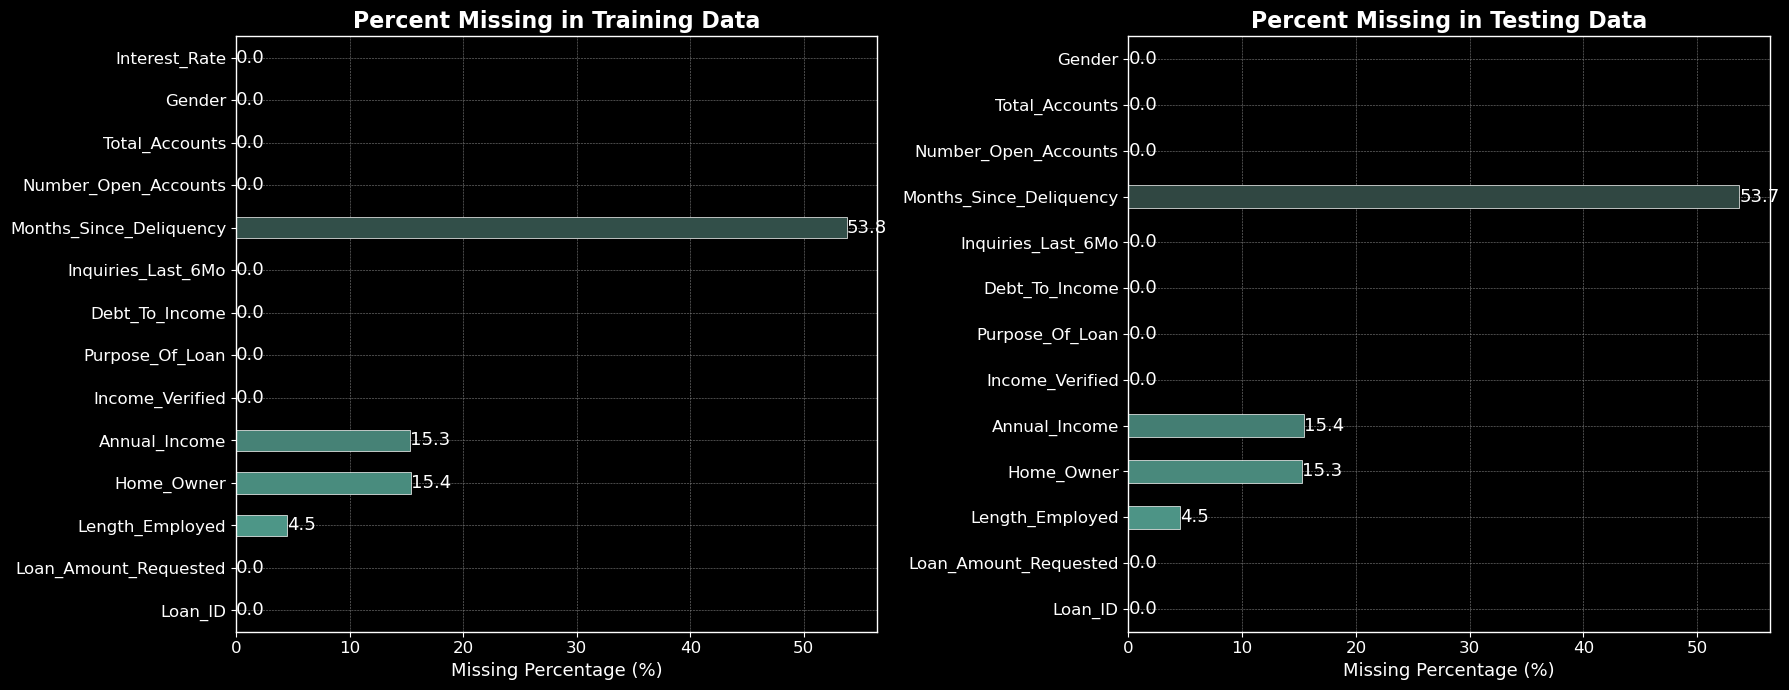

In [8]:
missing_train_data = round((train_df.isnull().sum()) * 100 / len(train_df), 2)
missing_test_data = round((test_df.isnull().sum()) * 100 / len(test_df), 2)

plt.style.use('dark_background')
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

train_colors = sns.color_palette("dark:#5A9_r", len(missing_train_data))
test_colors = sns.color_palette("dark:#5A9_r", len(missing_test_data))

missing_label_tr = missing_train_data.plot(kind='barh', ax=axes[0], color=train_colors, edgecolor='white')
axes[0].bar_label(missing_label_tr.containers[0], fmt='%.1f', color='white', fontsize=13)
axes[0].set_title("Percent Missing in Training Data", fontsize=16, fontweight='bold')
axes[0].set_xlabel("Missing Percentage (%)", fontsize=13)
axes[0].grid(True, color= 'gray', linestyle= '--', linewidth= 0.4)
axes[0].tick_params(axis='both', labelsize=12)

missing_label_te = missing_test_data.plot(kind='barh', ax=axes[1], color=test_colors, edgecolor='white')
axes[1].bar_label(missing_label_te.containers[0], fmt='%.1f', color='white', fontsize=13)
axes[1].set_title("Percent Missing in Testing Data", fontsize=16, fontweight='bold')
axes[1].set_xlabel("Missing Percentage (%)", fontsize=13)
axes[1].grid(True, color= 'gray', linestyle= '--', linewidth= 0.4)
axes[1].tick_params(axis='both', labelsize=12)

plt.tight_layout()
plt.show()

<div align="center">

#### Data Cleaning

</div>

In [9]:
train_df['Loan_Amount_Requested'] = train_df['Loan_Amount_Requested'].str.replace(',','').astype(float)
test_df['Loan_Amount_Requested'] = test_df['Loan_Amount_Requested'].str.replace(',','').astype(float)

In [10]:
for df in [train_df, test_df]:
    df['Length_Employed'] = df['Length_Employed'].fillna('0 years')
    df['Length_Employed'] = df['Length_Employed'].str.replace('< 1 year', '0 year')
    df['Length_Employed'] = df['Length_Employed'].str.replace('10+ years', '10 years')
    df['Length_Employed'] = df['Length_Employed'].str.extract('(\d+)').astype(float)

In [11]:
test_df['Length_Employed'].unique()

array([10.,  0.,  6.,  8.,  1.,  3.,  2.,  4.,  7.,  5.,  9.])

In [12]:
train_df['Length_Employed'].unique()

array([ 0.,  4.,  7.,  8.,  2., 10.,  1.,  6.,  9.,  3.,  5.])

In [13]:
for df in [train_df, test_df]:
    df['Home_Owner'] = df['Home_Owner'].fillna('Unknown')
    df['Annual_Income'] = df['Annual_Income'].fillna(df['Annual_Income'].median())

In [14]:
for df in [train_df, test_df]:
    df['HadDelinq'] = df['Months_Since_Deliquency'].notna().astype(int)

 - `HadDelinq = 1` -> The Customer had a past delinquency.
 - `HadDelinq = 0` -> The customer never had a delinquency.

In [15]:
for df in [train_df, test_df]:
    df['Months_Since_Deliquency'] = df['Months_Since_Deliquency'].fillna(-1)

<div align="center">

#### Fetaure Engineering

</div>

 - Create a ratio feature that compares the loan amount requested to the applicants's annual income
 - It reflects the relative size of the loan to the applicant's income.
 - A high ratio may indicate a higher financial risk.

In [16]:
for df in [train_df, test_df]:
    df['Loan_to_Income'] = round(df['Loan_Amount_Requested'] / df['Annual_Income'],2)

 - Calculate the proportion of currently open accounst to total accounts (open + closed)
 - A low ratio may indicate many closed accounts, possibly from credit missmanagement.
 - A very high ratio might suggest overexposure to credit.

In [17]:
for df in [train_df, test_df]:
    df['Open_to_Total_Acc'] = round(df['Number_Open_Accounts'] / df['Total_Accounts'],2)

In [18]:
train_df.head()

Loan_ID  Loan_Amount_Requested  Length_Employed Home_Owner  Annual_Income  \
0  10000001                 7000.0              0.0       Rent        68000.0   
1  10000002                30000.0              4.0   Mortgage        63000.0   
2  10000003                24725.0              7.0   Mortgage        75566.4   
3  10000004                16000.0              0.0    Unknown        56160.0   
4  10000005                17000.0              8.0        Own        96000.0   

            Income_Verified     Purpose_Of_Loan  Debt_To_Income  \
0              not verified                 car           18.37   
1         VERIFIED - income  debt_consolidation           14.93   
2  VERIFIED - income source  debt_consolidation           15.88   
3  VERIFIED - income source  debt_consolidation           14.34   
4  VERIFIED - income source  debt_consolidation           22.17   

   Inquiries_Last_6Mo  Months_Since_Deliquency  Number_Open_Accounts  \
0                   0                     -1.0                     9   
1                   0                     17.0                    12   
2                   0                     -1.0                    12   
3                   3                     -1.0                    16   
4                   1                     -1.0                    19   

   Total_Accounts  Gender  Interest_Rate  HadDelinq  Loan_to_Income  \
0              14  Female              1          0            0.10   
1              24  Female              3          1            0.48   
2              16    Male              3          0            0.33   
3              22    Male              3          0            0.28   
4              30  Female              1          0            0.18   

   Open_to_Total_Acc  
0               0.64  
1               0.50  
2               0.75  
3               0.73  
4               0.63

<div align="center">

#### Exploratory Data Analysis

</div>

In [19]:
test_ids = test_df['Loan_ID']

In [20]:
train_df.drop(columns= ['Loan_ID'], inplace= True)
test_df.drop(columns= ['Loan_ID'], inplace= True)

In [21]:
def classify_features(dff):
    categorical_cols = list()
    non_categorical_cols = list()
    discrete_cols = list()
    continuous_cols = list()

    for cols in dff.columns:
        if dff[cols].dtype == 'object':
            if dff[cols].nunique() < 15:
                categorical_cols.append(cols)
            else:
                non_categorical_cols.append(cols)
        elif dff[cols].dtype in ['int64','float64']:
            if dff[cols].nunique() < 10:
                discrete_cols.append(cols)
            else:
                continuous_cols.append(cols)
    return categorical_cols,non_categorical_cols,discrete_cols,continuous_cols

In [22]:
categorical_features, non_categorical_fetaures, discrete_features, continuous_features = classify_features(train_df)

In [23]:
print('Categorical Features are :',categorical_features)
print('\nNon-Categorical Fetaures are :',non_categorical_fetaures)
print('\nDiscrete Features are :',discrete_features)
print('\nConituous Features are :',continuous_features)

Categorical Features are : ['Home_Owner', 'Income_Verified', 'Purpose_Of_Loan', 'Gender']

Non-Categorical Fetaures are : []

Discrete Features are : ['Inquiries_Last_6Mo', 'Interest_Rate', 'HadDelinq']

Conituous Features are : ['Loan_Amount_Requested', 'Length_Employed', 'Annual_Income', 'Debt_To_Income', 'Months_Since_Deliquency', 'Number_Open_Accounts', 'Total_Accounts', 'Loan_to_Income', 'Open_to_Total_Acc']


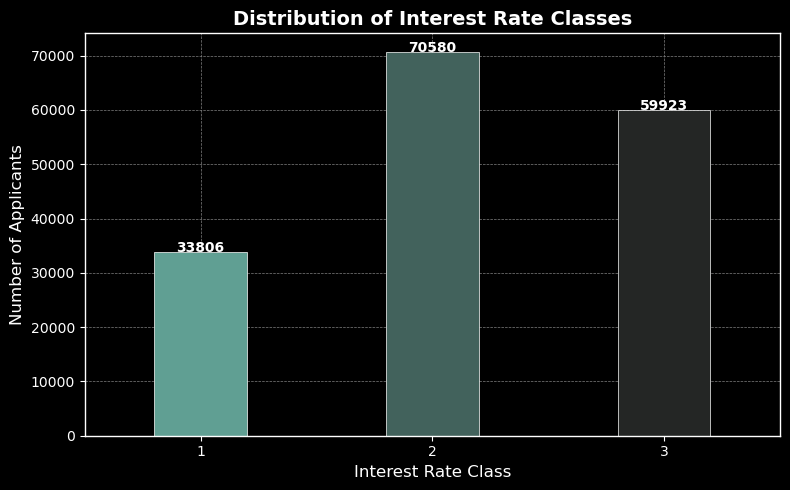

In [24]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x= 'Interest_Rate', data= train_df, palette= 'dark:#5A9_r', edgecolor= 'white', width= 0.4)

ax.set_facecolor("black")
ax.figure.set_facecolor("black")

ax.grid(True, color= 'gray', linestyle= '--', linewidth= 0.5)
ax.set_title("Distribution of Interest Rate Classes", fontsize= 14, fontweight= 'bold', color= 'white')
ax.set_xlabel("Interest Rate Class", fontsize= 12, color= 'white')
ax.set_ylabel("Number of Applicants", fontsize= 12, color= 'white')
ax.tick_params(colors= 'white')

for p in ax.patches:
    height= p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 5,
           f'{int(height)}', ha= 'center', fontsize= 10, fontweight= 'bold', color= 'white')

plt.tight_layout()
plt.show()

<div align="center">

##### Distribution of Categorical Features

</div>

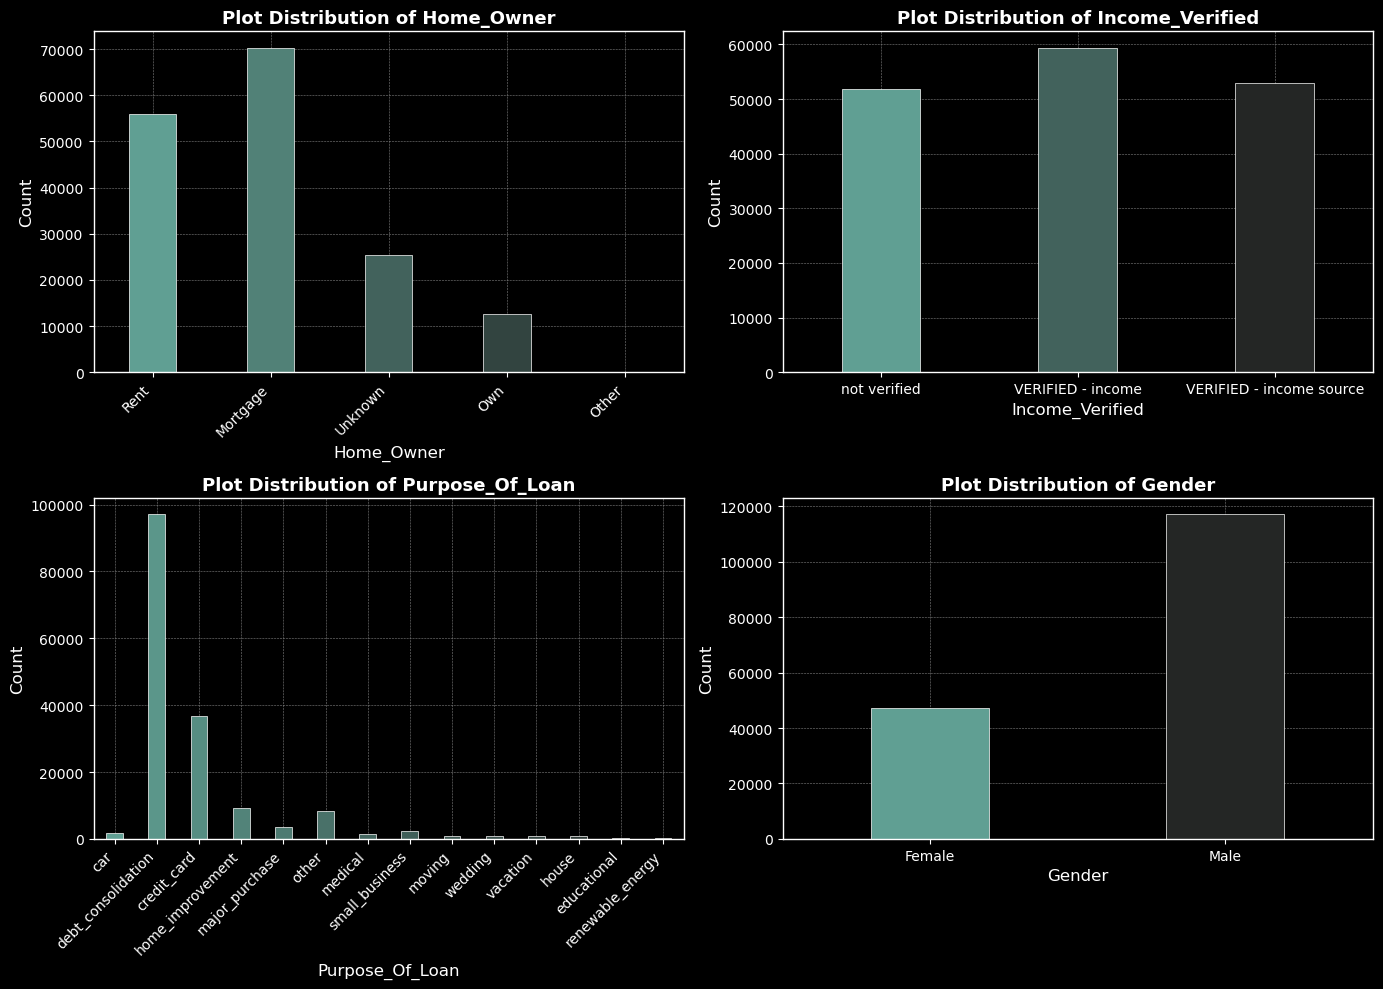

In [25]:
fig, axes = plt.subplots(2, 2, figsize= (14,10), facecolor= 'black')
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    ax = axes[i]
    plot_label = sns.countplot(data= train_df, x= col, ax= ax, palette= 'dark:#5A9_r', edgecolor= 'white', width= 0.4)
    ax.set_facecolor("black")
    ax.grid(True, color= 'gray', linestyle= '--', linewidth= 0.4)
    ax.set_title(f"Plot Distribution of {col}", fontsize= 13, fontweight= 'bold', color= 'white')
    ax.set_xlabel(col, color= 'white')
    ax.set_ylabel("Count", color= 'white')
    ax.tick_params(colors= 'white')

    if train_df[col].nunique() > 4:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
plt.tight_layout()
plt.show()

---

### 🔍 **1. Home\_Owner**

**Distribution:**

* Most applicants live in **mortgaged** or **rented** houses.
* Very few own homes outright (`Own`) or fall under `Other` categories.

**Insight:**

* Majority of loan applicants are not full homeowners, indicating potential **dependency on credit** for living.
* This could also impact **credit risk modeling**, as `Mortgage` holders may have ongoing large liabilities.

---

### 🔍 **2. Income\_Verified**

**Distribution:**

* Nearly evenly split among the three groups:

  * `VERIFIED - income`
  * `VERIFIED - income source`
  * `not verified`

**Insight:**

* A **significant proportion of applicants have unverified income**, which could increase **risk exposure**.
* Verified applicants can be segmented as **lower risk**, aiding in better **creditworthiness segmentation**.

---

### 🔍 **3. Purpose\_Of\_Loan**

**Distribution:**

* **Debt consolidation** is the **dominant loan purpose** by far.
* Followed by `credit card`, `home improvement`, and `major purchase`.
* Very few take loans for `vacation`, `renewable energy`, or `moving`.

**Insight:**

* High debt consolidation suggests many users are already **in debt cycles**, posing **medium to high credit risk**.
* Business-specific strategies can be built to **target or avoid certain loan purposes**.

---

### 🔍 **4. Gender**

**Distribution:**

* **Male applicants dominate** the dataset (almost 2.5× female applicants).

**Insight:**

* Imbalance might indicate a need to check for **gender bias** in modeling.
* Consider stratification or fairness metrics if gender is used in model training.

---

<div align="center">

##### Distribution of Continuous Features

</div>

In [26]:
continuous_features

['Loan_Amount_Requested',
 'Length_Employed',
 'Annual_Income',
 'Debt_To_Income',
 'Months_Since_Deliquency',
 'Number_Open_Accounts',
 'Total_Accounts',
 'Loan_to_Income',
 'Open_to_Total_Acc']

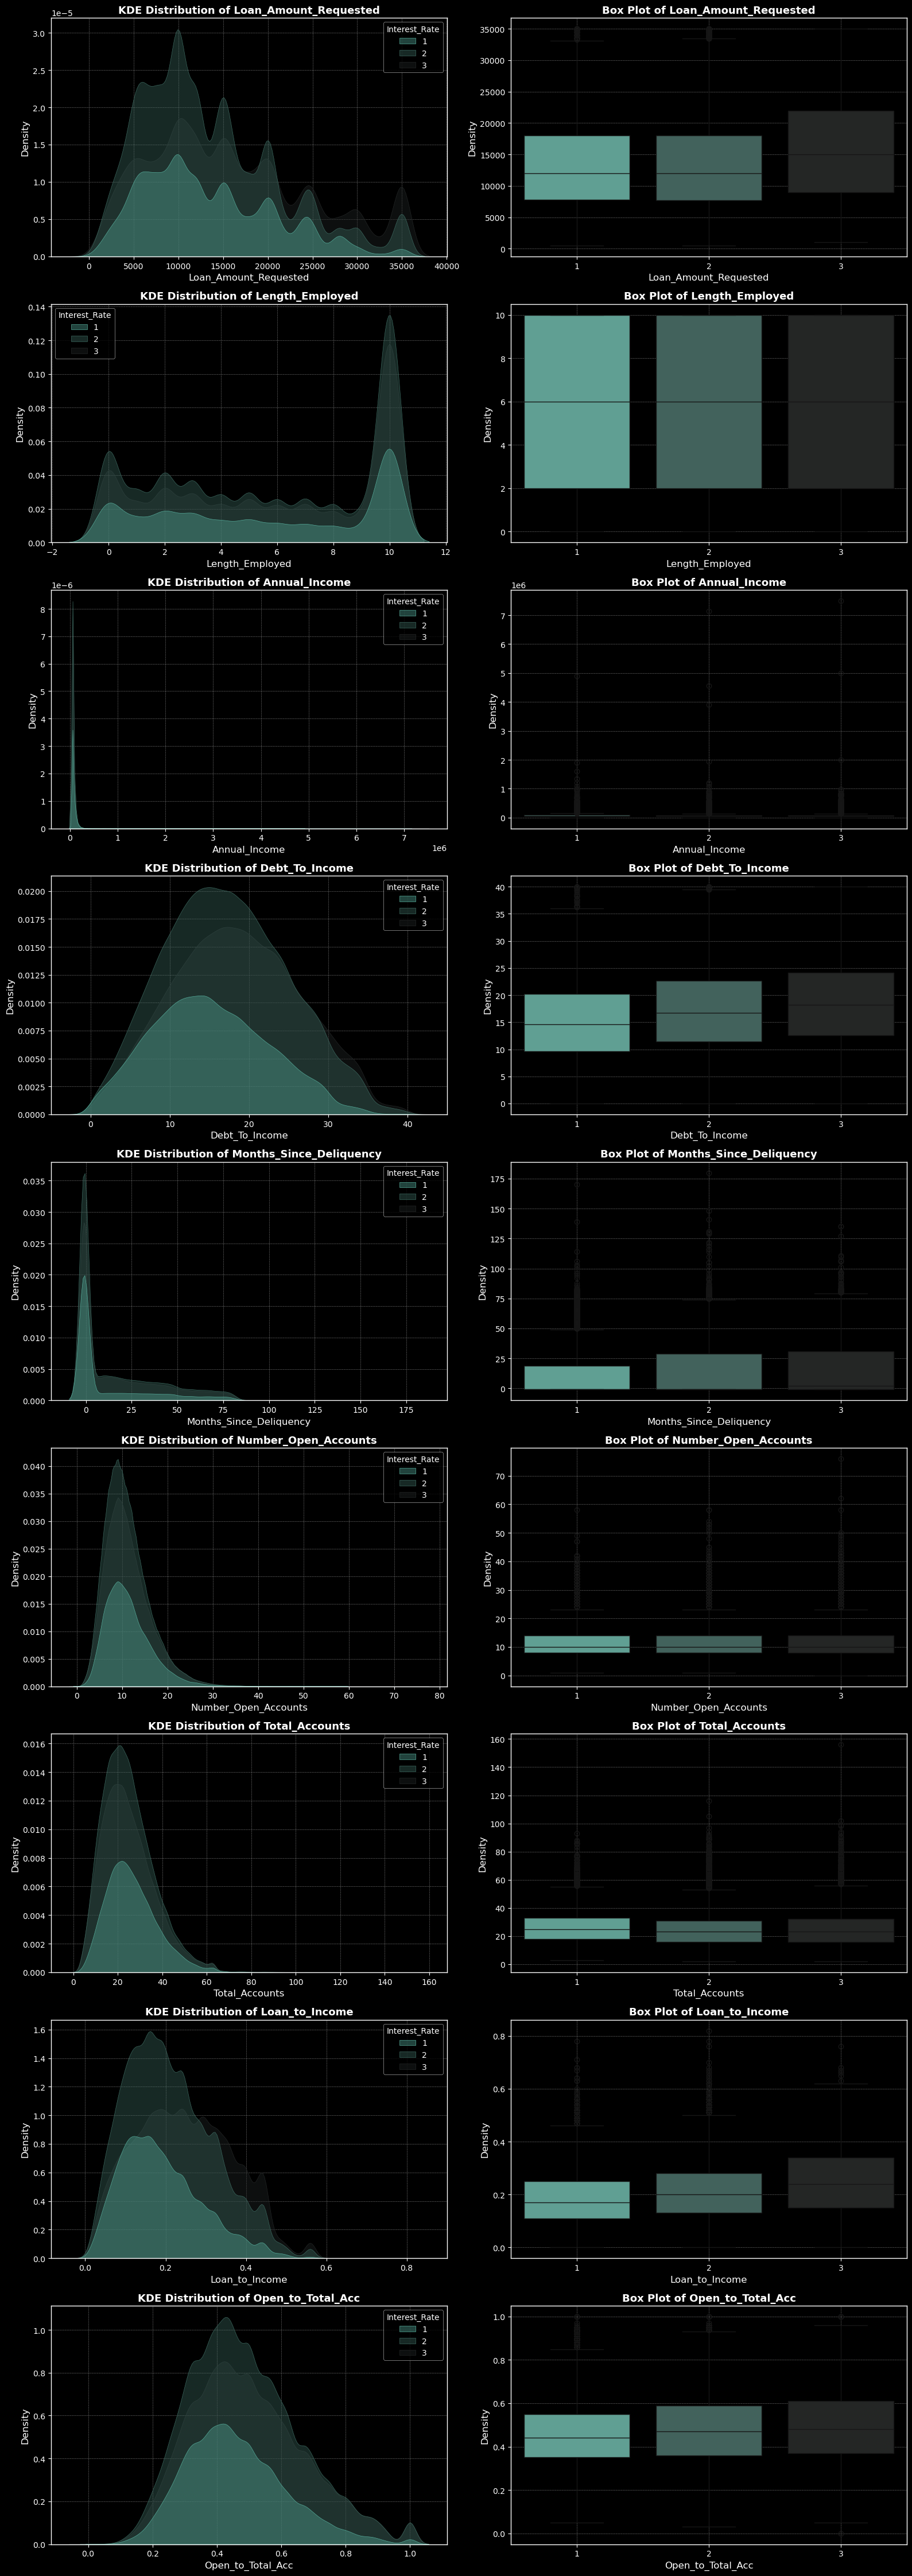

In [27]:
fig, axes = plt.subplots(9, 2, figsize= (16,45), facecolor= 'black')
fig.patch.set_facecolor('black')
plt.subplots_adjust(hspace=0.4)

for i, col in enumerate(continuous_features):
    kde_ax = axes[i, 0]
    sns.kdeplot(data= train_df, x= col, ax= kde_ax, hue= 'Interest_Rate', fill= True, palette= 'dark:#5A9_r', alpha= 0.4)

    kde_ax.set_facecolor("black")
    kde_ax.grid(True, color= 'gray', linestyle= '--', linewidth= 0.4)
    kde_ax.set_title(f"KDE Distribution of {col}", fontsize= 13, color= 'white', weight= 'bold')
    kde_ax.set_xlabel(col, color= 'white')
    kde_ax.set_ylabel("Density", color= 'white')
    kde_ax.tick_params(colors= 'white')

    box_ax = axes[i, 1]
    sns.boxplot(data= train_df, x= 'Interest_Rate', y= col, ax= box_ax, palette= 'dark:#5A9_r')

    box_ax.set_facecolor("black")
    box_ax.grid(True, color= 'gray', linestyle= '--', linewidth= 0.4)
    box_ax.set_title(f"Box Plot of {col}", fontsize= 13, color= 'white', weight= 'bold')
    box_ax.set_xlabel(col, color= 'white')
    box_ax.set_ylabel("Density", color= 'white')
    box_ax.tick_params(colors= 'white')
    
plt.tight_layout()
plt.show()

---

### 1. **Loan\_Amount\_Requested**

* 📈 **KDE Insight**: All classes peak around ₹10,000–15,000, but class 3 (high interest) shows heavier tail on the higher side.
* 📦 **Boxplot Insight**: Class 3 has a slightly **higher median loan amount** and **more outliers**, indicating they tend to request **larger loans**.

---

### 2. **Length\_Employed**

* 📈 **KDE Insight**: Peak at 10 years for all classes, indicating many applicants report max employment length.
* 📦 **Boxplot Insight**: No strong difference across classes. Might not be a major driver of interest rate class.

---

### 3. **Annual\_Income**

* 📈 **KDE Insight**: Skewed distribution, with majority having income < ₹1 lakh.
* 📦 **Boxplot Insight**: High interest rate group (3) has **lower median income** and more applicants with very low incomes, showing income plays a role.

---

### 4. **Debt\_To\_Income**

* 📈 **KDE Insight**: Lower DTI ratios are more common, but class 3 has a broader and slightly higher distribution.
* 📦 **Boxplot Insight**: Class 3 shows **higher DTI median** than class 1, suggesting higher debt pressure leads to higher risk.

---

### 5. **Months\_Since\_Delinquency**

* 📈 **KDE Insight**: Most have 0–10 months (or no delinquencies), but class 3 has more density in low ranges, suggesting **recent delinquencies**.
* 📦 **Boxplot Insight**: Clear separation – class 3 has a **lower median**, meaning **more recent delinquencies** are linked to higher interest.

---

### 6. **Number\_Open\_Accounts**

* 📈 **KDE Insight**: All classes cluster around 5–10 accounts.
* 📦 **Boxplot Insight**: Small separation; class 3 shows slightly more outliers with higher open accounts. Might indicate **overextension**.

---

### 7. **Total\_Accounts**

* 📈 **KDE Insight**: Bell-shaped curve across all classes.
* 📦 **Boxplot Insight**: Not much variation across interest classes. Not a strong indicator on its own.

---

### 8. **Loan\_to\_Income Ratio**

* 📈 **KDE Insight**: Class 3 has a **longer right tail**, meaning they request loans that are large relative to their income.
* 📦 **Boxplot Insight**: Class 3 has **higher median ratio**, showing higher **loan burden relative to income**.

---

### 9. **Open\_to\_Total\_Acc Ratio**

* 📈 **KDE Insight**: Most values between 0.2–0.6. Class 3 has more spread toward high values.
* 📦 **Boxplot Insight**: Class 3 has **slightly higher median**, suggesting **many open accounts vs. total** — could imply aggressive credit usage.

---

### 🔍 **General Patterns Observed**

* **Higher interest rates (class 3)** correlate with:

  * Lower income
  * Higher loan amount requests
  * Recent delinquency history
  * Higher debt-to-income and loan-to-income ratios
* **Credit utilization metrics** (e.g., `Open_to_Total_Acc`) are slightly elevated for riskier groups.

---

In [28]:
## Create quartile based income bins
train_df['Income_Bin'] = pd.qcut(train_df['Annual_Income'], q = 4, duplicates= 'drop')

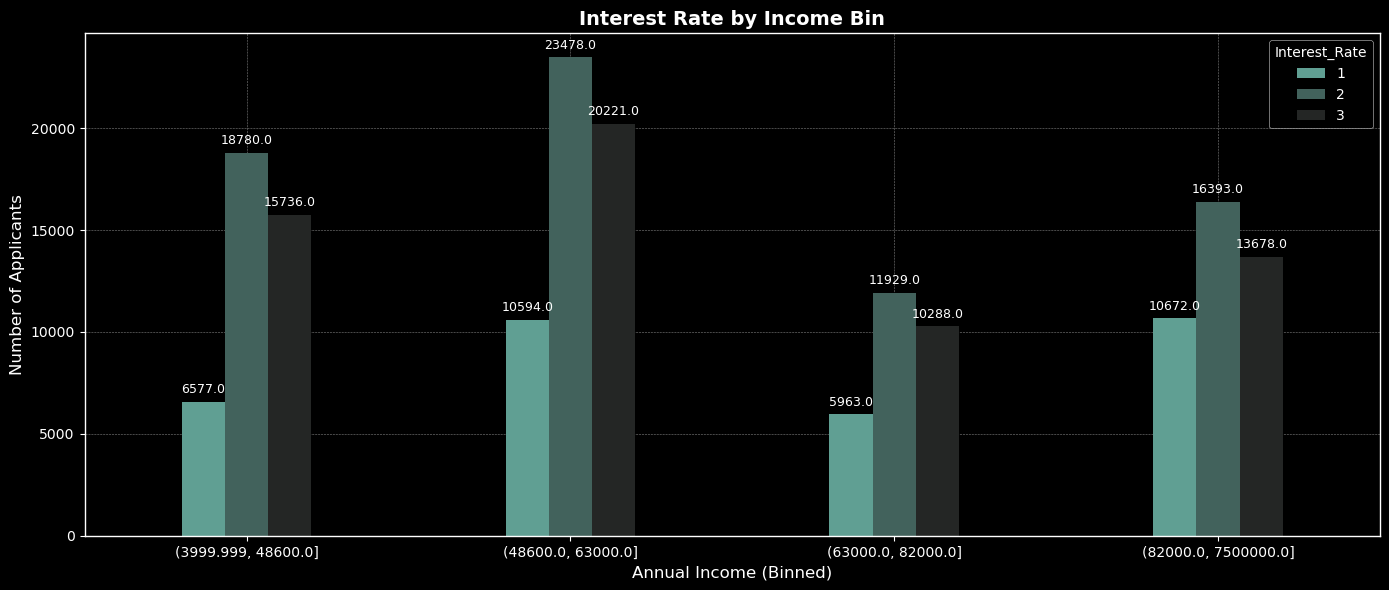

In [29]:
plt.figure(figsize= (14,6))

ax = sns.countplot(x= 'Income_Bin', hue= 'Interest_Rate', data= train_df, palette= 'dark:#5A9_r', width= 0.4)
ax.set_facecolor("black")
plt.gcf().patch.set_facecolor("black")

ax.grid(True, color= 'gray', linestyle= '--', linewidth= 0.4)
ax.set_title("Interest Rate by Income Bin", fontsize= 14, fontweight= 'bold', color= 'white')
ax.set_xlabel("Annual Income (Binned)", color= 'white')
ax.set_ylabel("Number of Applicants", color= 'white')
ax.tick_params(colors= 'white')

for p in ax.patches:
    height= p.get_height()
    if height > 0:
        ax.annotate(f"{height}", (p.get_x() + p.get_width() / 2., height),
                   ha= 'center', va= 'bottom', fontsize=9, color='white', xytext= (0,4), textcoords= 'offset points')
        
plt.tight_layout()
plt.show()

---

### 💡 **Key Insights:**

#### 🔹 1. **Low Income Group (₹4k – ₹48k)**

* Majority of applicants fall under **Interest Rate 2 (medium)** and **Interest Rate 3 (high)**.
* **Very few applicants** receive **Interest Rate 1 (low)**.
* ✅ Insight: Lower-income individuals are **less likely to qualify for lower interest rates**, possibly due to higher credit risk.

---

#### 🔹 2. **Mid-Low Income Group (₹48k – ₹63k)**

* Still dominated by **Interest Rate 2** and **3**.
* Slightly more people getting **Interest Rate 1** compared to the lowest income bin.
* ✅ Insight: Credit risk perception is slightly better here, but still not enough for mass low-interest approvals.

---

#### 🔹 3. **Mid-High Income Group (₹63k – ₹82k)**

* More balanced distribution.
* **Interest Rate 1 share increases**, showing better eligibility.
* ✅ Insight: **Middle-income segment begins to qualify more frequently** for lower rates.

---

#### 🔹 4. **High Income Group (₹82k – ₹7.5M)**

* Strong presence of **Interest Rate 1** and **Interest Rate 2**.
* Interest Rate 3 still present but reduced compared to lower income bins.
* ✅ Insight: **High-income applicants** are **more creditworthy**, receiving better interest rates.

---

### 📊 Summary Table:

| Income Bin   | Dominant Interest Rate(s) | Observation |
| ------------ | ------------------------- | ----------- |
| ₹4k – ₹48k   | 2 and 3                   | High risk   |
| ₹48k – ₹63k  | 2 > 3 > 1                 | Still risky |
| ₹63k – ₹82k  | 2 ≈ 3 > 1                 | Mixed       |
| ₹82k – ₹7.5M | 2 > 3 > 1                 | Lower risk  |

---

### 🔍 Business Implications:

* **Risk-Based Pricing Works**: Lenders are using income as a strong determinant of risk.
* **Targeting Opportunity**: Mid-income group is a key opportunity for offering slightly better rates with responsible lending programs.
* **Policy Suggestion**: Introduce **credit education** or **income-based refinancing** programs for low-income, high-interest applicants.

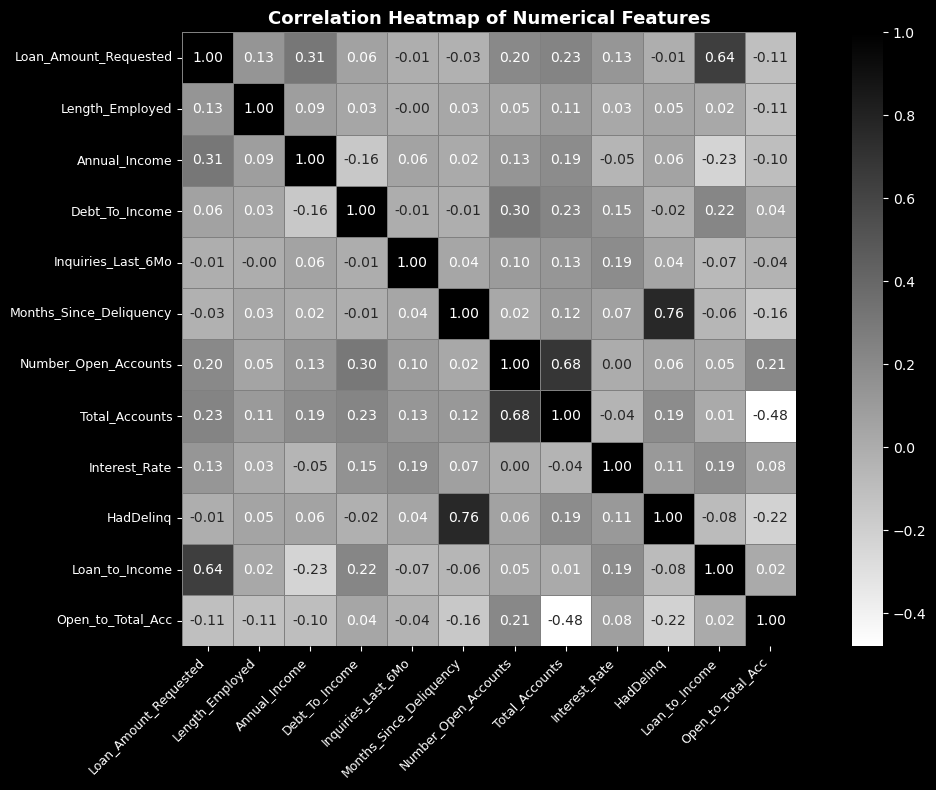

In [30]:
corr = train_df.corr(numeric_only= True)

plt.style.use('dark_background')
plt.figure(figsize=(12,8))

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='binary',
    linewidths=0.5,
    linecolor='gray',
    square=True
)

plt.title("Correlation Heatmap of Numerical Features", fontsize=13, fontweight='bold', color='white')
plt.xticks(rotation=45, ha='right', fontsize=9, color='white')
plt.yticks(rotation=0, fontsize=9, color='white')
plt.tight_layout()
plt.show()

<div align="center">

##### Descriptive Statistics Summary

</div>

In [31]:
train_df.describe().T.style.background_gradient(cmap= 'Dark2_r').set_caption("Decsriptive Statistics for Numerical Features")

<div align="center">

##### Skewness & Kurtosis Check

</div>

In [32]:
from scipy.stats import skew, kurtosis

In [33]:
continuous_features

['Loan_Amount_Requested',
 'Length_Employed',
 'Annual_Income',
 'Debt_To_Income',
 'Months_Since_Deliquency',
 'Number_Open_Accounts',
 'Total_Accounts',
 'Loan_to_Income',
 'Open_to_Total_Acc']

In [34]:
stat_data = pd.DataFrame({
    'Skewness': train_df[continuous_features].apply(skew),
    'Kurtosis': train_df[continuous_features].apply(kurtosis)
}).sort_values(by= 'Skewness', key= lambda x:abs(x), ascending= False)

stat_data.style.bar(subset= ['Skewness', 'Kurtosis'], color= 'darkcyan', align= 'mid')

- `Annual_Income` is extremely skewed and heavily tailed strong feature for log transformation.
- Fetaures like `Months_Since_Deliquency` & `Number_Open_Accounts` have moderate skew and outliers; consider winsoriaztion.
- `Length_Employed` has a mild negative skew.

<div align="center">

##### Feature Transformation

</div>

- Log transformation for highly skewed and heavy-tailed features.

In [35]:
for df in [train_df, test_df]:
    df['Log_Annual_Income'] = np.log1p(df['Annual_Income'])
    df['Log_Months_Since_Deliquency'] = np.log1p(df['Months_Since_Deliquency'].clip(lower=0))

 - Winsorization for moderate outliers

In [36]:
from scipy.stats.mstats import winsorize

In [37]:
open_accounts_winsorized_tr = winsorize(train_df['Number_Open_Accounts'], limits= [0.01, 0.01])
open_accounts_winsorized_te = winsorize(test_df['Number_Open_Accounts'], limits= [0.01, 0.01])

train_df['Winsorized_Open_Accounts'] = open_accounts_winsorized_tr
test_df['Winsorized_Open_Accounts'] = open_accounts_winsorized_te

 - Binning Length_Employed into categorical ranges.

In [38]:
for df in [train_df, test_df]:
    df['Employment_Length_Bin'] = pd.cut(df['Length_Employed'],
                                         bins= [-1, 2, 5, 10, 20, np.inf],
                                         labels= ['0-2 yrs', '2-5 yrs', '5-10 yrs', '10-20 yrs', '20+ yrs'])

 - Scailing Numerical Features with Standard Scaler

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [40]:
train_df_scaled = train_df.copy()
test_df_scaled = test_df.copy()

In [41]:
feature_to_scale = ['Loan_Amount_Requested', 'Loan_to_Income', 'Debt_To_Income', 'Open_to_Total_Acc']

train_df_scaled[feature_to_scale] = scaler.fit_transform(train_df[feature_to_scale])
test_df_scaled[feature_to_scale] = scaler.transform(test_df[feature_to_scale])

<div align="center">

##### Comparision Feature distribution after Transformation

</div>

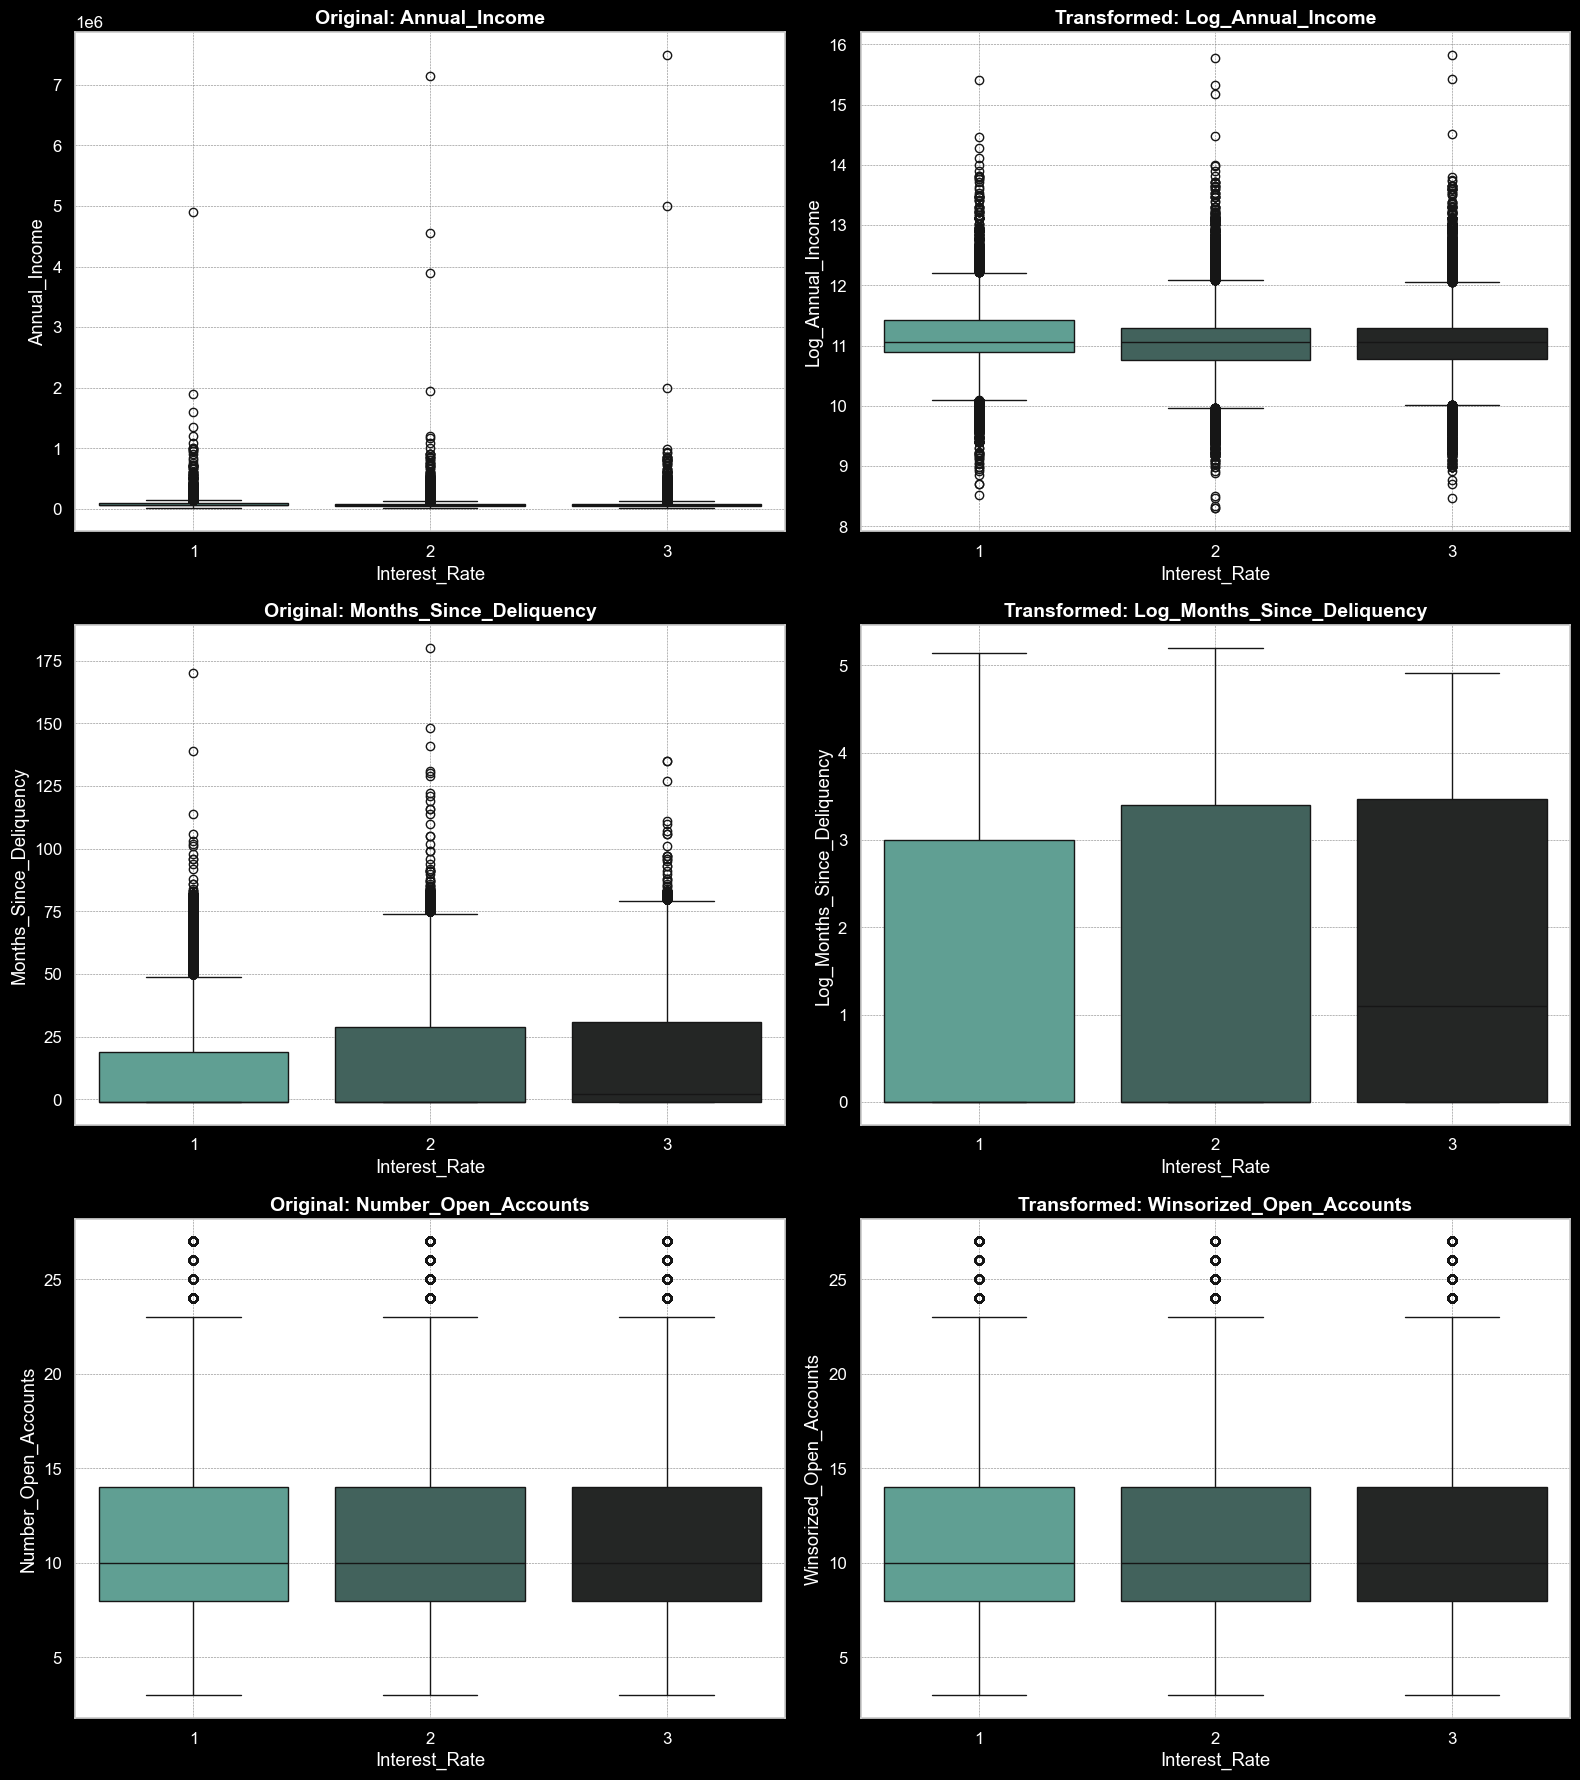

In [42]:
feature_pairs = [
    ("Annual_Income", 'Log_Annual_Income'),
    ("Months_Since_Deliquency", "Log_Months_Since_Deliquency"),
    ("Number_Open_Accounts", "Winsorized_Open_Accounts")
]

sns.set(style= "whitegrid", font_scale= 1.1)

fig, axes = plt.subplots(3, 2, figsize= (16,18), facecolor= 'black')
fig.patch.set_facecolor('black')
plt.subplots_adjust(hspace= 0.4)

for i, (original, transformed) in enumerate(feature_pairs):
    original_ax = axes[i,0]
    sns.boxplot(data= train_df_scaled, y= original, x= 'Interest_Rate', palette= 'dark:#5A9_r', ax= original_ax )
    
    original_ax.grid(True, color= 'gray', linestyle= '--', linewidth= 0.4)
    original_ax.set_title(f"Original: {original}", fontsize= 14, fontweight= 'bold', color= 'white')
    original_ax.set_xlabel("Interest_Rate", color= 'white')
    original_ax.set_ylabel(original, color= 'white')
    original_ax.tick_params(colors= 'white')

    transform_ax = axes[i,1]
    sns.boxplot(data= train_df_scaled, y= transformed, x= 'Interest_Rate', palette= 'dark:#5A9_r', ax= transform_ax )
    
    transform_ax.grid(True, color= 'gray', linestyle= '--', linewidth= 0.4)
    transform_ax.set_title(f"Transformed: {transformed}", fontsize= 14, fontweight= 'bold', color= 'white')
    transform_ax.set_xlabel("Interest_Rate", color= 'white')
    transform_ax.set_ylabel(transformed, color= 'white')
    transform_ax.tick_params(colors= 'white')

plt.tight_layout()
plt.show()

<div align="center">

##### Feature Selection

</div>

`Chi-Square Test` -- for categorical features
 - **Purpose**: Measures whether there is a statistically significant relationship between categorical variable.
 - Whether variables like `Home_Owner`, `Income_Verified`, `Purpose_Of_Loan` and `Gender` are associated with `Interest_Rate`.
 - A **low p-value** (typically < 0.05) -> Variable is significantly related to the target -> Keep it
 - A **high p-value** -> variable may be dropped.

In [43]:
from scipy.stats import chi2_contingency

In [44]:
categorical_features = train_df_scaled.select_dtypes(include=['O']).columns.tolist()
categorical_features

['Home_Owner', 'Income_Verified', 'Purpose_Of_Loan', 'Gender']

In [45]:
chi2_results = {}

for col in categorical_features:
    contingency_table = pd.crosstab(train_df_scaled[col], train_df_scaled['Interest_Rate'])
    chi2_stats, p_val, _, _ = chi2_contingency(contingency_table)
    chi2_results[col] = p_val

print("\nChi-Square Test Results: \n")
for col, p in chi2_results.items():
    print(f"{col}: p-value = {p:.4f} {'Significant' if p < 0.05 else 'Not Significant'}")


Chi-Square Test Results: 

Home_Owner: p-value = 0.0000 Significant
Income_Verified: p-value = 0.0000 Significant
Purpose_Of_Loan: p-value = 0.0000 Significant
Gender: p-value = 0.1578 Not Significant


 - **Gender** does not significantly affect the interest classification rate in this dataset.

`ANOVA (Analysis of Variance)` - For Numerical Features
 - **Purpose**: Checks if the mean values of a numerical feature differ significantly across different groups of a categorical target.
 - **Low p-value** --> Fetaure's values differ across target feature groups -> Useful Predictor
 - **High p-value** --> Not helpful in distinguishing classes --> Consider dropping

In [46]:
from scipy.stats import f_oneway

In [47]:
anova_results = {}

continuous_cols = {'Log_Annual_Income', 'Loan_Amount_Requested', 'Debt_To_Income', 'Open_to_Total_Acc', 'Log_Months_Since_Deliquency',
                  'Loan_to_Income', 'Total_Accounts', 'Winsorized_Open_Accounts'}

for col in continuous_cols:
    groups = [group[col] for _, group in train_df_scaled.groupby('Interest_Rate')]
    f_stat, p_val = f_oneway(*groups)
    anova_results[col] = p_val

print("\nANOVA Test Results: \n")
for col, p in anova_results.items():
    print(f"{col}: p-value = {p:.4f} {'Significant' if p < 0.05 else 'Not Significant'}")


ANOVA Test Results: 

Debt_To_Income: p-value = 0.0000 Significant
Open_to_Total_Acc: p-value = 0.0000 Significant
Total_Accounts: p-value = 0.0000 Significant
Log_Months_Since_Deliquency: p-value = 0.0000 Significant
Loan_to_Income: p-value = 0.0000 Significant
Loan_Amount_Requested: p-value = 0.0000 Significant
Winsorized_Open_Accounts: p-value = 0.0000 Significant
Log_Annual_Income: p-value = 0.0000 Significant


 - All tested numeric features are statsitically significant.
 - This means they all  have meaningful variation across different interest categories, and should be retained for modeling.

**Final Columns to Drop**

In [48]:
cols_to_drop = ['Length_Employed', 'Annual_Income', 'Months_Since_Deliquency', 'Number_Open_Accounts', 'Gender']

train_df_scaled = train_df_scaled.drop(columns= cols_to_drop)
test_df_scaled = test_df_scaled.drop(columns= cols_to_drop)

In [49]:
train_df_scaled = train_df_scaled.drop(columns= ['Income_Bin'])

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
categorical_features

['Home_Owner', 'Income_Verified', 'Purpose_Of_Loan', 'Gender']

In [52]:
le = LabelEncoder()
train_df_scaled['Income_Verified'] = le.fit_transform(train_df_scaled['Income_Verified'])

In [53]:
test_df_scaled['Income_Verified'] = le.transform(test_df_scaled['Income_Verified'])

In [54]:
train_df_scaled['Employment_Length_Bin'] = le.fit_transform(train_df_scaled['Employment_Length_Bin'])
test_df_scaled['Employment_Length_Bin'] = le.transform(test_df_scaled['Employment_Length_Bin'])

In [55]:
train_df_scaled = pd.get_dummies(train_df_scaled, columns=['Home_Owner', 'Purpose_Of_Loan'], drop_first=True, dtype= int)
test_df_scaled = pd.get_dummies(test_df_scaled, columns=['Home_Owner', 'Purpose_Of_Loan'], drop_first=True, dtype= int)

In [56]:
train_df_scaled.head()

Loan_Amount_Requested  Income_Verified  Debt_To_Income  Inquiries_Last_6Mo  \
0              -0.887404                2        0.148222                   0   
1               1.889756                0       -0.290270                   0   
2               1.252820                1       -0.169175                   0   
3               0.199311                1       -0.365477                   3   
4               0.320057                1        0.632603                   1   

   Total_Accounts  Interest_Rate  HadDelinq  Loan_to_Income  \
0              14              1          0       -1.053687   
1              24              3          1        2.267408   
2              16              3          0        0.956450   
3              22              3          0        0.519463   
4              30              1          0       -0.354509   

   Open_to_Total_Acc  Log_Annual_Income  Log_Months_Since_Deliquency  \
0           0.900827          11.127278                     0.000000   
1           0.088731          11.050906                     2.890372   
2           1.538902          11.232780                     0.000000   
3           1.422889          10.935978                     0.000000   
4           0.842820          11.472114                     0.000000   

   Winsorized_Open_Accounts  Employment_Length_Bin  Home_Owner_Other  \
0                         9                      0                 0   
1                        12                      1                 0   
2                        12                      2                 0   
3                        16                      0                 0   
4                        19                      2                 0   

   Home_Owner_Own  Home_Owner_Rent  Home_Owner_Unknown  \
0               0                1                   0   
1               0                0                   0   
2               0                0                   0   
3               0                0                   1   
4               1                0                   0   

   Purpose_Of_Loan_credit_card  Purpose_Of_Loan_debt_consolidation  \
0                            0                                   0   
1                            0                                   1   
2                            0                                   1   
3                            0                                   1   
4                            0                                   1   

   Purpose_Of_Loan_educational  Purpose_Of_Loan_home_improvement  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3                            0                                 0   
4                            0                                 0   

   Purpose_Of_Loan_house  Purpose_Of_Loan_major_purchase  \
0                      0                               0   
1                      0                               0   
2                      0                               0   
3                      0                               0   
4                      0                               0   

   Purpose_Of_Loan_medical  Purpose_Of_Loan_moving  Purpose_Of_Loan_other  \
0                        0                       0                      0   
1                        0                       0                      0   
2                        0                       0                      0   
3                        0                       0                      0   
4                        0                       0                      0   

   Purpose_Of_Loan_renewable_energy  Purpose_Of_Loan_small_business  \
0                                 0                               0   
1                                 0                               0   
2                                 0                    

In [57]:
test_df_scaled.head()

Loan_Amount_Requested  Income_Verified  Debt_To_Income  Inquiries_Last_6Mo  \
0               1.587891                0       -0.552856                   0   
1               1.406772                2       -0.744059                   0   
2              -0.999094                0       -1.322768                   2   
3              -0.283673                1       -1.204222                   0   
4               2.493486                2       -0.967130                   0   

   Total_Accounts  HadDelinq  Loan_to_Income  Open_to_Total_Acc  \
0              37          1       -0.092317          -1.245426   
1              23          0        0.169874          -1.303433   
2              20          0       -1.228482          -1.361440   
3               8          0       -0.529304           1.538902   
4              21          1       -0.004920          -0.317317   

   Log_Annual_Income  Log_Months_Since_Deliquency  Winsorized_Open_Accounts  \
0          11.767575                     4.234107                        10   
1          11.608245                     0.000000                         6   
2          11.225257                     0.000000                         5   
3          11.198228                     0.000000                         6   
4          11.957618                     3.295837                         9   

   Employment_Length_Bin  Home_Owner_Other  Home_Owner_Own  Home_Owner_Rent  \
0                      2                 0               0                0   
1                      2                 0               0                0   
2                      0                 0               0                1   
3                      2                 0               0                0   
4                      0                 0               0                0   

   Home_Owner_Unknown  Purpose_Of_Loan_credit_card  \
0                   0                            0   
1                   1                            1   
2                   0                            0   
3                   0                            0   
4                   0                            0   

   Purpose_Of_Loan_debt_consolidation  Purpose_Of_Loan_educational  \
0                                   1                            0   
1                                   0                            0   
2                                   1                            0   
3                                   1                            0   
4                                   1                            0   

   Purpose_Of_Loan_home_improvement  Purpose_Of_Loan_house  \
0                                 0                      0   
1                                 0                      0   
2                                 0                      0   
3                                 0                      0   
4                                 0                      0   

   Purpose_Of_Loan_major_purchase  Purpose_Of_Loan_medical  \
0                               0                        0   
1                               0                        0   
2                               0                        0   
3                               0                        0   
4                               0                        0   

   Purpose_Of_Loan_moving  Purpose_Of_Loan_other  \
0                       0                      0   
1                       0                      0   
2                       0                      0   
3                       0                      0   
4                       0                      0   

   Purpose_Of_Loan_renewable_energy  Purpose_Of_Loan_small_business  \
0                                 0                               0   
1                                 0                               0   
2                                 0                               0   
3                                 0                               0   
4  

In [58]:
test_df_scaled.shape

(109541, 29)

<div align="center">

##### Model Training & Evaluation

</div>

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [60]:
X = train_df_scaled.drop(columns= ['Interest_Rate'])
y = train_df_scaled['Interest_Rate'].map({1: 0, 2: 1, 3: 2})

In [61]:
y.value_counts()

Interest_Rate
1    70580
2    59923
0    33806
Name: count, dtype: int64

In [62]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.2, stratify= y, random_state= 42)

In [63]:
lr = LogisticRegression(max_iter= 1000)
rf = RandomForestClassifier(n_estimators= 100, random_state= 42)
xgb = XGBClassifier(use_label_encoder= False, eval_metric= 'mlogloss')

In [64]:
models = {
    "Logistic Regression": lr,
    "Random Forest": rf,
    "XGBoost": xgb
}

In [65]:
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    acc = accuracy_score(y_val, preds)
    print(f"\nModel: {name}")
    print(f"Accuracy: {acc: .4f}")
    print(classification_report(y_val, preds))


Model: Logistic Regression
Accuracy:  0.5262
              precision    recall  f1-score   support

           0       0.52      0.23      0.32      6761
           1       0.49      0.65      0.56     14116
           2       0.58      0.55      0.56     11985

    accuracy                           0.53     32862
   macro avg       0.53      0.48      0.48     32862
weighted avg       0.53      0.53      0.51     32862


Model: Random Forest
Accuracy:  0.5185
              precision    recall  f1-score   support

           0       0.49      0.27      0.35      6761
           1       0.49      0.61      0.54     14116
           2       0.56      0.55      0.56     11985

    accuracy                           0.52     32862
   macro avg       0.52      0.48      0.48     32862
weighted avg       0.52      0.52      0.51     32862


Model: XGBoost
Accuracy:  0.5376
              precision    recall  f1-score   support

           0       0.52      0.28      0.37      6761
         

- Use SMOTE Technique

In [66]:
from imblearn.over_sampling import SMOTE 

In [67]:
smote = SMOTE(random_state= 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

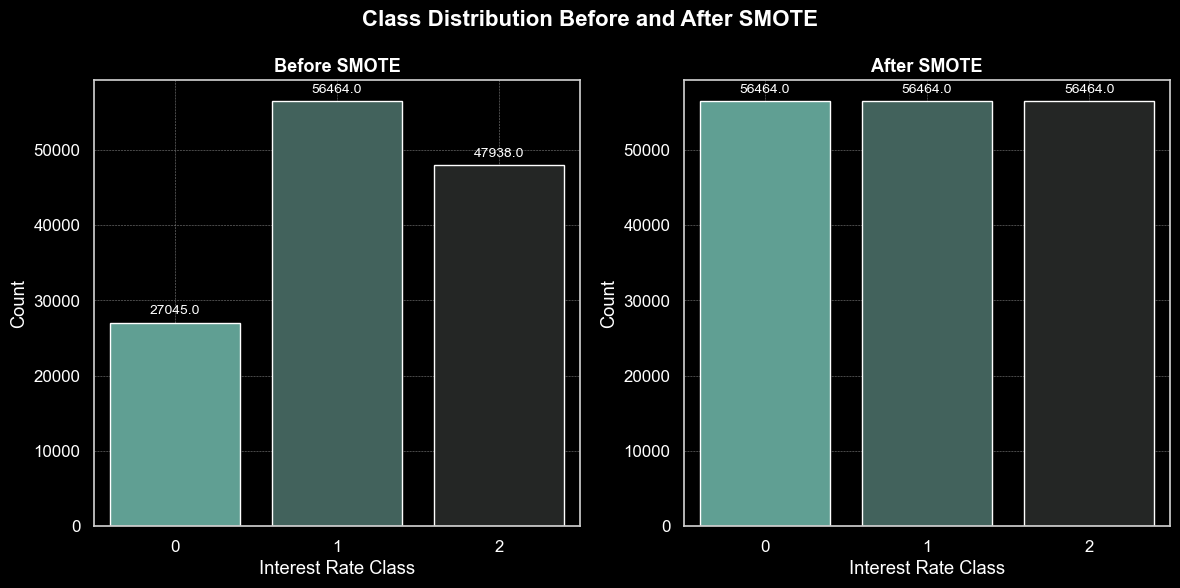

In [68]:
fig, axes = plt.subplots(1,2, figsize= (12,6), facecolor= 'black')

# Before SMOTE
sns.countplot(x= y_train, ax= axes[0], palette= 'dark:#5A9_r')
plt.gcf().patch.set_facecolor("black")

axes[0].grid(True, color= 'gray', linestyle= '--', linewidth= 0.4)
axes[0].set_title("Before SMOTE", fontsize= 13, fontweight= 'bold', color= 'white')
axes[0].set_xlabel("Interest Rate Class", color= 'white')
axes[0].set_ylabel("Count", color= 'white')
axes[0].tick_params(colors= 'white')
axes[0].set_facecolor("black")

for p in axes[0].patches:
    height= p.get_height()
    if height > 0:
        axes[0].annotate(f"{height}", (p.get_x() + p.get_width() / 2., height),
                   ha= 'center', va= 'bottom', fontsize=10, color='white', xytext= (0,4), textcoords= 'offset points')
        
# After SMOTE
sns.countplot(x= y_train_resampled, ax= axes[1], palette= 'dark:#5A9_r')
plt.gcf().patch.set_facecolor("black")

axes[1].grid(True, color= 'gray', linestyle= '--', linewidth= 0.4)
axes[1].set_title("After SMOTE", fontsize= 13, fontweight= 'bold', color= 'white')
axes[1].set_xlabel("Interest Rate Class", color= 'white')
axes[1].set_ylabel("Count", color= 'white')
axes[1].tick_params(colors= 'white')
axes[1].set_facecolor("black")

for p in axes[1].patches:
    height= p.get_height()
    if height > 0:
        axes[1].annotate(f"{height}", (p.get_x() + p.get_width() / 2., height),
                   ha= 'center', va= 'bottom', fontsize=10, color='white', xytext= (0,4), textcoords= 'offset points')
        
fig.suptitle("Class Distribution Before and After SMOTE", color= 'white', fontsize=16, weight= 'bold')
plt.tight_layout()
plt.show()

 - Model Re-Building using Resampled Data

In [69]:
for name, new_model in models.items():
    new_model.fit(X_train_resampled, y_train_resampled)
    preds = new_model.predict(X_val)
    acc = accuracy_score(y_val, preds)
    print(f"\nModel: {name}")
    print(f"Accuracy: {acc: .4f}")
    print(classification_report(y_val, preds))


Model: Logistic Regression
Accuracy:  0.4955
              precision    recall  f1-score   support

           0       0.39      0.52      0.44      6761
           1       0.51      0.39      0.44     14116
           2       0.56      0.61      0.58     11985

    accuracy                           0.50     32862
   macro avg       0.49      0.51      0.49     32862
weighted avg       0.50      0.50      0.49     32862


Model: Random Forest
Accuracy:  0.4990
              precision    recall  f1-score   support

           0       0.40      0.46      0.43      6761
           1       0.50      0.45      0.47     14116
           2       0.55      0.59      0.57     11985

    accuracy                           0.50     32862
   macro avg       0.49      0.50      0.49     32862
weighted avg       0.50      0.50      0.50     32862


Model: XGBoost
Accuracy:  0.5207
              precision    recall  f1-score   support

           0       0.42      0.45      0.44      6761
         

**Insights**: 
 - SMOTE improved minority class(0) recall, especially in Logistic Regression.
 - `XGBoost` performs best overall with highest accuracy and f1-scores all classes.
 - Logistic Regression still struggles with class 1, suggesting linear models are not enough.
 - Random Forest is stable but not significantly better than before.

**Next Steps**:
 - Use **XGBoost + SMOTE** as our Baseline model.
 - Consider **hyperparameter tuning** of XGBoost now to push performance further.

<div align="center">

##### Model Hyper Parameter Tuning

</div>

In [70]:
# Create Base Line model
xgb = XGBClassifier(objective= 'multi:softmax',
                   num_class= 3,
                   use_label_encoder= False,
                   eval_metric= 'mlogloss',
                   random_state= 42)

In [71]:
## Define Hyper-Parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'min_child_weight': [1, 3, 5]
}

In [72]:
from sklearn.model_selection import RandomizedSearchCV

In [73]:
rs_cv = RandomizedSearchCV(
    estimator= xgb,
    param_distributions= param_dist,
    n_iter= 10,
    scoring= 'accuracy',
    cv = 3,
    verbose=1,
    random_state= 42,
    n_jobs= -1
)

In [74]:
rs_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_con...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_class=3, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.3, 0.5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 200, 300, 400],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=1)

In [75]:
## Evaluate Best model
best_xgb = rs_cv.best_estimator_

In [76]:
y_train_pred = best_xgb.predict(X_train)
y_test_pred = best_xgb.predict(X_val)

In [77]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.56      0.29      0.38     27045
           1       0.52      0.66      0.58     56464
           2       0.61      0.59      0.60     47938

    accuracy                           0.56    131447
   macro avg       0.57      0.51      0.52    131447
weighted avg       0.56      0.56      0.55    131447



In [78]:
print(classification_report(y_val, y_test_pred))

              precision    recall  f1-score   support

           0       0.53      0.28      0.36      6761
           1       0.50      0.64      0.56     14116
           2       0.60      0.57      0.58     11985

    accuracy                           0.54     32862
   macro avg       0.54      0.49      0.50     32862
weighted avg       0.54      0.54      0.53     32862



In [79]:
train_df_scaled.head()

Loan_Amount_Requested  Income_Verified  Debt_To_Income  Inquiries_Last_6Mo  \
0              -0.887404                2        0.148222                   0   
1               1.889756                0       -0.290270                   0   
2               1.252820                1       -0.169175                   0   
3               0.199311                1       -0.365477                   3   
4               0.320057                1        0.632603                   1   

   Total_Accounts  Interest_Rate  HadDelinq  Loan_to_Income  \
0              14              1          0       -1.053687   
1              24              3          1        2.267408   
2              16              3          0        0.956450   
3              22              3          0        0.519463   
4              30              1          0       -0.354509   

   Open_to_Total_Acc  Log_Annual_Income  Log_Months_Since_Deliquency  \
0           0.900827          11.127278                     0.000000   
1           0.088731          11.050906                     2.890372   
2           1.538902          11.232780                     0.000000   
3           1.422889          10.935978                     0.000000   
4           0.842820          11.472114                     0.000000   

   Winsorized_Open_Accounts  Employment_Length_Bin  Home_Owner_Other  \
0                         9                      0                 0   
1                        12                      1                 0   
2                        12                      2                 0   
3                        16                      0                 0   
4                        19                      2                 0   

   Home_Owner_Own  Home_Owner_Rent  Home_Owner_Unknown  \
0               0                1                   0   
1               0                0                   0   
2               0                0                   0   
3               0                0                   1   
4               1                0                   0   

   Purpose_Of_Loan_credit_card  Purpose_Of_Loan_debt_consolidation  \
0                            0                                   0   
1                            0                                   1   
2                            0                                   1   
3                            0                                   1   
4                            0                                   1   

   Purpose_Of_Loan_educational  Purpose_Of_Loan_home_improvement  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3                            0                                 0   
4                            0                                 0   

   Purpose_Of_Loan_house  Purpose_Of_Loan_major_purchase  \
0                      0                               0   
1                      0                               0   
2                      0                               0   
3                      0                               0   
4                      0                               0   

   Purpose_Of_Loan_medical  Purpose_Of_Loan_moving  Purpose_Of_Loan_other  \
0                        0                       0                      0   
1                        0                       0                      0   
2                        0                       0                      0   
3                        0                       0                      0   
4                        0                       0                      0   

   Purpose_Of_Loan_renewable_energy  Purpose_Of_Loan_small_business  \
0                                 0                               0   
1                                 0                               0   
2                                 0                    

In [80]:
from sklearn.ensemble import StackingClassifier

In [81]:
stack_model = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100)),
        ('xgb', XGBClassifier(use_label_encoder=False,num_class= 3, eval_metric='mlogloss')),
        ('lr', LogisticRegression(max_iter=500))
    ],
    final_estimator=LogisticRegression()
)

In [82]:
stack_model.fit(X_train, y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='mlogloss',
                                              feature_types=None,
                                              feature_weights=None, gamma=None,
                                              grow_policy=None,...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_class=3, ...)),
                               ('lr', LogisticRegression(max_iter=500))],
                   final_estimator=LogisticRegression())

In [83]:
y_pred = stack_model.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.27      0.36      6761
           1       0.50      0.65      0.56     14116
           2       0.60      0.56      0.58     11985

    accuracy                           0.54     32862
   macro avg       0.55      0.49      0.50     32862
weighted avg       0.55      0.54      0.53     32862



---

> After building and evaluating the stacked ensemble model, the results indicate moderate overall performance with an accuracy of approximately 54% and a weighted F1-score of 0.53 on the validation set. Notably, class 0 suffers from significantly low recall (0.27), suggesting that the model struggles to correctly identify samples from this class. Despite using a complex stacking approach, the predictive power appears limited — likely due to insufficiently informative or imbalanced features. Therefore, to enhance model performance, especially class separability and generalization, the next logical step is to focus on **feature engineering**. This will involve creating new derived features to help the model better capture underlying patterns in the data.

---

<div align="center">

##### Feature Engineering

</div>

In [84]:
train_df.drop(columns=['Income_Bin'], inplace= True)

In [85]:
new_train_df = train_df.copy()
new_test_df = test_df.copy()

In [86]:
for df in [new_train_df, new_test_df]:
    df['Debt_Income_Ratio'] = df['Debt_To_Income'] / (df['Loan_to_Income'] + 1e-5)

- It shows how financially stressed someone might be.
- A high value means the person might already have a lot of debt and this loan is big extra load.
- So, it's a helpful feature to spot high-risk borrowers.

In [87]:
for df in [new_train_df, new_test_df]:
    df['Income_per_Account'] = df['Log_Annual_Income'] / (df['Total_Accounts'] + 1)

- Measures Average Income per Credit Account.

In [88]:
for df in [new_train_df, new_test_df]:
    df['Delinq_Ratio'] = df['Log_Months_Since_Deliquency'] / (df['Winsorized_Open_Accounts'] + 1)

- Helps in identifying whether old deliquencies are still relevant given credit account.

In [89]:
for df in [new_train_df, new_test_df]:
    df['Loan_to_Income_Bin'] = pd.cut(df['Loan_to_Income'], bins= 3, labels= ['Low', 'Medium', 'High'])

In [90]:
for df in [new_train_df, new_test_df]:
    df['Log_Income_Bin'] = pd.qcut(df['Log_Annual_Income'], q=3, labels= ["Low", "Medium", "High"])

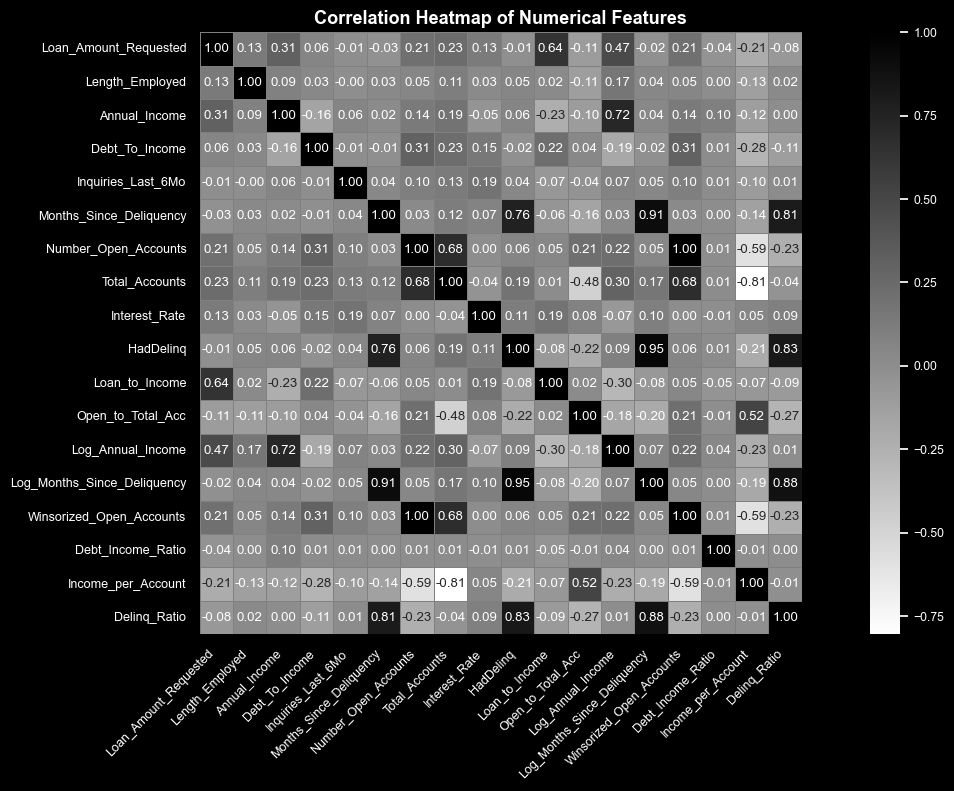

In [91]:
corr = new_train_df.corr(numeric_only= True)

sns.set(style= "whitegrid", font_scale= 0.8)
plt.style.use('dark_background')
plt.figure(figsize=(14,8))

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='binary',
    linewidths=0.5,
    linecolor='gray',
    square=True
)

plt.title("Correlation Heatmap of Numerical Features", fontsize=13, fontweight='bold', color='white')
plt.xticks(rotation=45, ha='right', fontsize=9, color='white')
plt.yticks(rotation=0, fontsize=9, color='white')
plt.tight_layout()
plt.show()

In [92]:
threshold = 0.9
correlation_matrix = new_train_df.corr(numeric_only=True)
num_features = new_train_df.select_dtypes(include= np.number).columns.tolist()

high_corr = np.where((np.abs(correlation_matrix) >= threshold) & (correlation_matrix != 1))

correlated_pairs = [(num_features [i], num_features[j]) for i, j in zip(*high_corr) if i < j]

print("Highly correlated pairs:")
print(correlated_pairs)

columns_to_drop = set()
for col1, col2 in correlated_pairs:
    columns_to_drop.add(col2)

print("Columns to drop:", columns_to_drop)

Highly correlated pairs:
[('Months_Since_Deliquency', 'Log_Months_Since_Deliquency'), ('HadDelinq', 'Log_Months_Since_Deliquency')]
Columns to drop: {'Log_Months_Since_Deliquency'}


In [93]:
new_train_df.drop(columns= ['Log_Months_Since_Deliquency'], inplace= True)
new_test_df.drop(columns= ['Log_Months_Since_Deliquency'], inplace= True)

In [94]:
num_features = new_train_df.select_dtypes(include= np.number).columns.tolist()

In [95]:
num_features.remove("Log_Annual_Income")

In [96]:
num_features.remove("Interest_Rate")

In [97]:
num_features.remove("Winsorized_Open_Accounts")

In [98]:
scaler = StandardScaler()
new_train_df[num_features] = scaler.fit_transform(new_train_df[num_features])
new_test_df[num_features] = scaler.transform(new_test_df[num_features])

In [99]:
categorical_cols = new_train_df.select_dtypes(exclude= ['object', np.number]).columns.tolist()

for df in [new_train_df, new_test_df]:
    df[categorical_cols] = df[categorical_cols].astype(str)

In [100]:
new_train_df.drop(columns= ['Gender'], inplace= True)
new_test_df.drop(columns= ['Gender'], inplace= True)

In [101]:
new_train_df.select_dtypes(include= 'object').columns.tolist()

['Home_Owner',
 'Income_Verified',
 'Purpose_Of_Loan',
 'Employment_Length_Bin',
 'Loan_to_Income_Bin',
 'Log_Income_Bin']

In [102]:
le = LabelEncoder()
new_train_df['Income_Verified'] = le.fit_transform(new_train_df['Income_Verified'])
new_test_df['Income_Verified'] = le.transform(new_test_df['Income_Verified'])

In [103]:
new_train_df = pd.get_dummies(new_train_df, columns= ['Home_Owner',
                                                      'Purpose_Of_Loan',
                                                      'Employment_Length_Bin',
                                                      'Loan_to_Income_Bin',
                                                      'Log_Income_Bin'], drop_first= True, dtype= int)

new_test_df = pd.get_dummies(new_test_df, columns= ['Home_Owner',
                                                    'Purpose_Of_Loan',
                                                    'Employment_Length_Bin',
                                                    'Loan_to_Income_Bin',
                                                    'Log_Income_Bin'], drop_first= True, dtype= int)

In [104]:
new_train_df.shape

(164309, 41)

In [105]:
new_test_df.shape

(109541, 40)

In [106]:
X = new_train_df.drop(columns= ['Interest_Rate'])
y = new_train_df['Interest_Rate'].map({1:0, 2:1, 3:2})

In [107]:
y.value_counts()

Interest_Rate
1    70580
2    59923
0    33806
Name: count, dtype: int64

In [108]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify= y, test_size= 0.2, random_state= 42)

In [109]:
from imblearn.combine import SMOTETomek

In [110]:
smote_tomek = SMOTETomek(random_state= 42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

In [111]:
y_resampled.value_counts()

Interest_Rate
0    54305
2    49695
1    48900
Name: count, dtype: int64

In [112]:
# Create Base Line model
xgb = XGBClassifier(objective= 'multi:softmax',
                   num_class= 3,
                   use_label_encoder= False,
                   eval_metric= 'mlogloss',
                   random_state= 42)

In [113]:
## Define Hyper-Parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'min_child_weight': [1, 3, 5]
}

In [114]:
random_search = RandomizedSearchCV(
    estimator= xgb,
    param_distributions= param_dist,
    n_iter= 30,
    scoring= 'f1_weighted',
    cv = 3,
    verbose=2,
    random_state= 42,
    n_jobs= -1
)

In [115]:
random_search.fit(X_resampled, y_resampled)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_con...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_class=3, ...),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.3, 0.5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 200, 300, 400],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='f1_weighted', verbose=2)

In [116]:
## Evaluate Best model
final_xgb = random_search.best_estimator_

In [117]:
y_train_pred = final_xgb.predict(X_train)
y_val_pred = final_xgb.predict(X_val)

In [118]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.48      0.59      0.53     27045
           1       0.63      0.54      0.58     56464
           2       0.66      0.69      0.67     47938

    accuracy                           0.60    131447
   macro avg       0.59      0.60      0.59    131447
weighted avg       0.61      0.60      0.60    131447



In [119]:
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.41      0.50      0.45      6761
           1       0.52      0.44      0.48     14116
           2       0.58      0.60      0.59     11985

    accuracy                           0.51     32862
   macro avg       0.50      0.52      0.51     32862
weighted avg       0.52      0.51      0.51     32862



---

<div align="center">

### **Overall Model Performance Insights**

</div>

**Model Type:**

**XGBoost Classifier** after advanced feature engineering and SMOTETomek resampling.

**Key Metrics on Test Set:**

| Metric          | Value |
| --------------- | ----- |
| **Accuracy**    | 0.51  |
| **Macro F1**    | 0.51  |
| **Weighted F1** | 0.51  |

**Class-wise Performance:**

| Class | Precision | Recall | F1-Score | Support |
| ----- | --------- | ------ | -------- | ------- |
| **0** | 0.41      | 0.50   | 0.45     | 6761    |
| **1** | 0.52      | 0.44   | 0.48     | 14116   |
| **2** | 0.58      | 0.60   | 0.59     | 11985   |

**Interpretation:**

* The model shows **moderate discriminative power**, with slightly better performance on class **2** (high-risk class).
* **Class 0 (low risk)** has **poor recall**, meaning many low-risk applicants are misclassified.
* Balanced **macro and weighted F1-scores** (\~0.51) suggest **uniform but modest** predictive power across all classes.
* **Class imbalance** continues to affect model performance despite resampling. Further tuning may improve minority class recall.

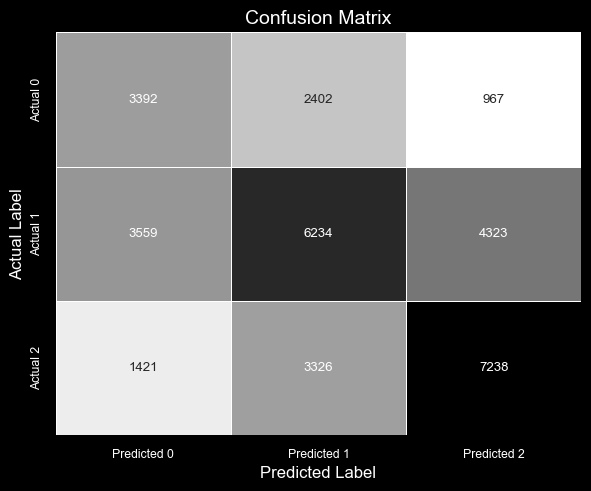

In [120]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot= True, cmap= 'binary',fmt='d', cbar= False,linewidths= 0.4,
           xticklabels= ['Predicted 0', 'Predicted 1', 'Predicted 2'],
           yticklabels= ['Actual 0', 'Actual 1', 'Actual 2'])
plt.title("Confusion Matrix", fontsize= 14)
plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("Actual Label", fontsize= 12)
plt.tight_layout()
plt.show()

In [121]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
pd.options.plotting.backend = "plotly"

In [122]:
importances = final_xgb.feature_importances_
features = X_train.columns
feature_importance = pd.DataFrame({"FEATURE": features, "IMPORTANCE": importances})
feature_importance.sort_values(by= ['IMPORTANCE'], ascending= False, inplace= True, ignore_index= True)

feature_importance = feature_importance.head(15)

trace1 = go.Bar(
    x=feature_importance['IMPORTANCE'],
    y=feature_importance['FEATURE'],
    text=round(feature_importance['IMPORTANCE'], 4).astype(str),
    textposition='auto',
    orientation='h',
    marker=dict(
        color=feature_importance['IMPORTANCE'],
        colorscale='deep',  
        colorbar=dict(title='Importance')
    )
)

layout = go.Layout(
    title='FEATURE IMPORTANCE',
    xaxis=dict(title='MEAN DECREASE IMPURITY'),
    yaxis=dict(title='FEATURE', autorange='reversed'),
)

fig = go.Figure(data=[trace1], layout=layout)

fig.update_layout(height=600, width=800, template='plotly_dark')
fig.show()

---

<div align="center">

### **Top Feature Importance Insights (from XGBoost)**

</div>

| Rank | Feature                                  | Relative Importance | Business Insight                                                                                                              |
| ---- | ---------------------------------------- | ------------------- | ----------------------------------------------------------------------------------------------------------------------------- |
| 1    | **HadDelinq**                            | 0.085               | **Historical delinquencies** are the strongest signal of borrower risk. Past defaulters are more likely to default again.     |
| 2    | **Loan\_to\_Income\_Bin\_Low**           | 0.078               | Applicants with a **low loan burden relative to income** are considered lower risk. Model prioritizes this economic strength. |
| 3    | **Inquiries\_Last\_6Mo**                 | 0.078               | Frequent **credit inquiries** can suggest financial distress or aggressive borrowing behavior.                                |
| 4    | **Loan\_to\_Income\_Bin\_Medium**        | 0.050               | The **middle range** of loan-to-income is also informative—likely helps model distinguish borderline cases.                   |
| 5    | **Purpose\_Of\_Loan\_other**             | 0.046               | A generic loan purpose may lack clarity and imply risk; diverse or vague categories can reduce confidence.                    |
| 6    | **Purpose\_Of\_Loan\_credit\_card**      | 0.044               | Loans used to pay off **credit card debt** may reflect pre-existing financial strain.                                         |
| 7    | **Income\_Verified**                     | 0.044               | **Verified income** increases model trust in the applicant’s financial profile. Lack of verification can be a red flag.       |
| 8    | **Purpose\_Of\_Loan\_renewable\_energy** | 0.036               | May reflect niche loan types — either high-value investments or less typical borrowers.                                       |
| 9    | **Purpose\_Of\_Loan\_educational**       | 0.035               | Education loans, while often productive, may involve **longer ROI and higher default lag**.                                   |
| 10   | **Purpose\_Of\_Loan\_medical**           | 0.030               | Medical loans often indicate **emergency financial need**, which can correlate with higher risk.                              |
| 11   | **Purpose\_Of\_Loan\_home\_improvement** | 0.028               | Reflects investment in property but could involve large amounts, affecting risk exposure.                                     |
| 12   | **Purpose\_Of\_Loan\_major\_purchase**   | 0.028               | Suggests substantial financial outlay — may raise credit burden temporarily.                                                  |
| 13   | **Purpose\_Of\_Loan\_small\_business**   | 0.028               | Small business loans tend to be riskier due to **market dependency and variable income**.                                     |
| 14   | **Purpose\_Of\_Loan\_house**             | 0.026               | House loans reflect stability but may involve high principal. Important but slightly less discriminative.                     |

---

### 💡 **Insights Summary:**

* **Borrower behavior and income reliability dominate feature influence**.
* The model is particularly sensitive to:

  * Past credit issues (e.g., delinquencies),
  * Verified income and recent inquiries,
  * Loan-to-income ratios (especially in binned form),
  * Purpose of the loan — especially for ambiguous or high-risk types.
* Feature engineering (especially binning ratios and capturing purpose categories) has clearly boosted the model’s interpretability and performance.

---

<div align="center">

### Test Data Prediction

</div>

In [123]:
test_pred = final_xgb.predict(new_test_df)

In [124]:
test_data = pd.read_csv("banking_test_data.csv")

In [125]:
test_data['Interest_Rate_Prediction'] = test_pred

In [126]:
test_data['Interest_Rate_Prediction'] = test_data['Interest_Rate_Prediction'].map({0: "Low Risk", 1: "Medium Risk", 2: "High Risk"})

In [127]:
test_data.head()

Loan_ID Loan_Amount_Requested Length_Employed Home_Owner  Annual_Income  \
0  10164310                27,500       10+ years   Mortgage       129000.0   
1  10164311                26,000       10+ years        NaN       110000.0   
2  10164312                 6,075        < 1 year       Rent        75000.0   
3  10164313                12,000       10+ years   Mortgage        73000.0   
4  10164314                35,000        < 1 year   Mortgage       156000.0   

            Income_Verified     Purpose_Of_Loan  Debt_To_Income  \
0         VERIFIED - income  debt_consolidation           12.87   
1              not verified         credit_card           11.37   
2         VERIFIED - income  debt_consolidation            6.83   
3  VERIFIED - income source  debt_consolidation            7.76   
4              not verified  debt_consolidation            9.62   

   Inquiries_Last_6Mo  Months_Since_Deliquency  Number_Open_Accounts  \
0                   0                     68.0                    10   
1                   0                      NaN                     6   
2                   2                      NaN                     5   
3                   0                      NaN                     6   
4                   0                     26.0                     9   

   Total_Accounts Gender Interest_Rate_Prediction  
0              37   Male                 Low Risk  
1              23   Male                 Low Risk  
2              20   Male                High Risk  
3               8   Male              Medium Risk  
4              21   Male              Medium Risk

<div align="center">

### Risk Profiling

</div>

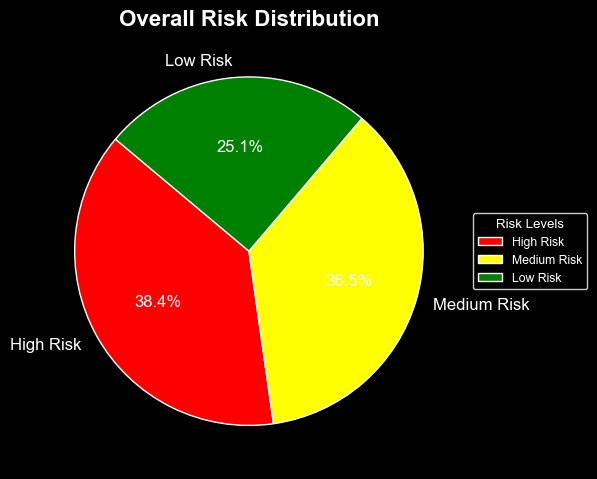

In [128]:
risk_counts = test_data['Interest_Rate_Prediction'].value_counts()
labels = risk_counts.index
sizes = risk_counts.values

colors = ['Red', 'yellow', 'green']

plt.figure(figsize= (6,6))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels= labels,
    autopct= '%1.1f%%',
    startangle= 140,
    colors= colors,
    textprops= {'color': 'white', 'fontsize': 12}
)

plt.gca().set_facecolor('black')
plt.gcf().patch.set_facecolor('black')
plt.title("Overall Risk Distribution", fontsize= 16, fontweight= 'bold', color= 'white')
plt.legend(wedges, labels,
          title= 'Risk Levels',
          loc= 'center left',
          bbox_to_anchor= (1, 0, 0.5, 1),
          facecolor= 'black',
          edgecolor= 'white',
          labelcolor= 'white')
plt.tight_layout()
plt.show()

---

#### **Insights**:

1. **High Risk dominates**:

   * The largest portion of the predicted applicants (\~38%) falls into the **High Risk** category.
   * This indicates a **substantial number of applicants are likely to default or show poor credit behavior**.
   * Financial institutions may want to **tighten approval criteria** or **increase interest rates** for this segment.

2. **Medium Risk is comparable**:

   * The **Medium Risk** group is almost equal in size to the High Risk group, making up **36.5%**.
   * This segment represents a **critical grey area** — these applicants may default under certain conditions.
   * Lenders may consider **additional verification** or **conditional loan approvals** (e.g., guarantor, collateral) for this group.

3. **Low Risk is the smallest group**:

   * Only **25.1%** are predicted as Low Risk.
   * This suggests that **truly creditworthy applicants are limited** in the current dataset.
   * These customers are ideal for **pre-approved loans**, **premium offers**, or **long-term relationships**.

In [129]:
test_data['Length_Employed'] = test_data['Length_Employed'].fillna('0 years')
test_data['Length_Employed'] = test_data['Length_Employed'].str.replace('< 1 year', '0 year')
test_data['Length_Employed'] = test_data['Length_Employed'].str.replace('10+ years', '10 years')
test_data['Length_Employed'] = test_data['Length_Employed'].str.extract('(\d+)').astype(float)

test_data['Employment_Length_Bin'] = pd.cut(test_data['Length_Employed'],
                                         bins= [-1, 2, 5, 10, 20, np.inf],
                                         labels= ['0-2 yrs', '2-5 yrs', '5-10 yrs', '10-20 yrs', '20+ yrs'])

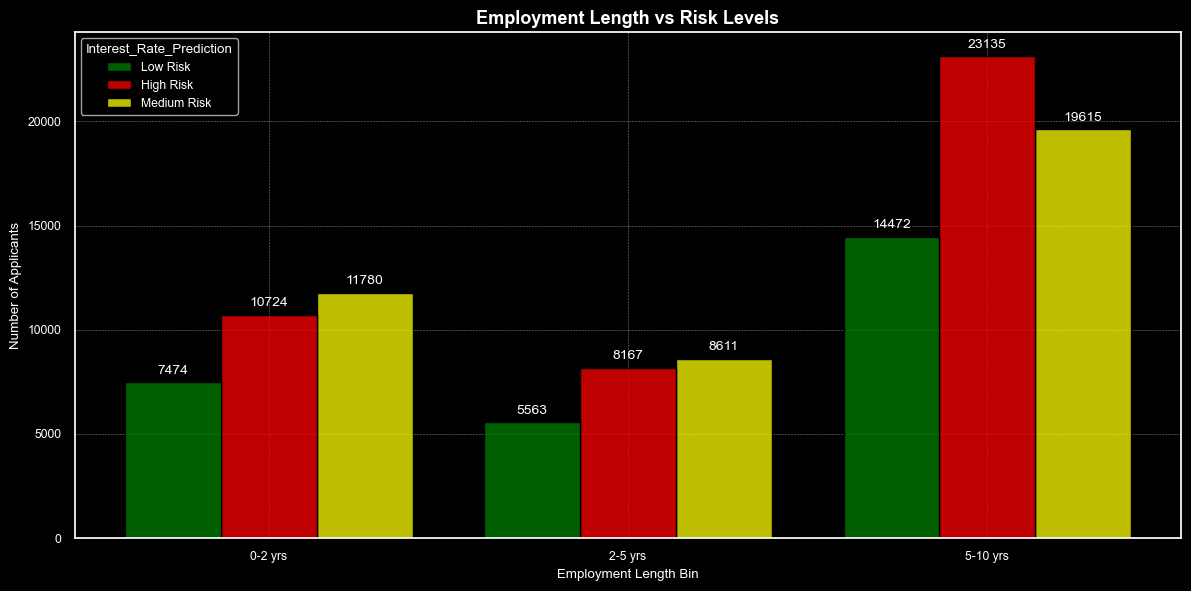

In [130]:
custom_palette = {
    'High Risk': 'Red',
    'Medium Risk': 'Yellow',
    'Low Risk': 'Green'
}

plt.figure(figsize= (12,6))
ax = sns.histplot(data= test_data,
                 x = 'Employment_Length_Bin',
                 hue= 'Interest_Rate_Prediction',
                 multiple= 'dodge',
                 shrink= 0.8,
                 palette= custom_palette,
                 edgecolor= 'black',
                 legend= True)

plt.gcf().patch.set_facecolor('black')
ax.grid(True, color= 'gray', linestyle= '--', linewidth= 0.4)
ax.set_title("Employment Length vs Risk Levels", fontsize= 13, fontweight= 'bold', color= 'white')
ax.set_xlabel("Employment Length Bin", color= 'white')
ax.set_ylabel("Number of Applicants", color= 'white')
ax.tick_params(colors= 'white')
ax.set_facecolor("black")

for p in ax.patches:
    height= p.get_height()
    if height > 0:
        ax.annotate(f"{height}", (p.get_x() + p.get_width() / 2., height),
                   ha= 'center', va= 'bottom', fontsize=10, color='white', xytext= (0,4), textcoords= 'offset points')
        
plt.tight_layout()
plt.show()

---

### 🔍 **Key Insights**:

#### 1. **Longer Employment Correlates with More Applicants**

* The **5–10 yrs** bin has the highest number of applicants across **all risk levels**.

  * 📌 Suggests applicants with longer job stability are more common in the dataset.
  * These individuals may be more eligible for credit products due to higher income stability.

---

#### 2. **High Risk is Prominent Even in Stable Jobs**

* In the **5–10 yrs** group:

  * **High Risk** applicants = **23,135** (📈 highest among all bars).
  * This challenges the usual assumption that longer employment equals lower risk.
  * Likely indicates that **other financial factors** (e.g., high debt, delinquencies) still dominate risk prediction, even with job security.

---

#### 3. **Low Employment Experience Shows Moderate Risk**

* In the **0–2 yrs** group:

  * **Medium Risk** applicants are most frequent (**11,780**), followed by **High Risk** (**10,724**).
  * Indicates that **short work history is linked with uncertainty**, pushing many applicants into medium/high risk categories.

---

#### 4. **2–5 Years Bin Has Fewer Applicants Overall**

* The **2–5 yrs** segment shows the **lowest total applicant count**, possibly due to dataset distribution.
* Risk levels are more evenly distributed here:

  * Suggests this group is **transitional**, and applicants are spread across all risk levels.

---

### **Business Implications**:

* Longer employment does not guarantee lower risk — **creditworthiness must be evaluated holistically**.
* A significant number of **long-employed individuals are still high risk**, which could suggest issues like:

  * High loan burden
  * Delinquency history
  * Low income relative to debt
* 🏦 Lenders should:

  * Pair employment length with income stability, spending behavior, and credit history for better risk profiling.
  * Consider **automated risk stratification** tools that include job duration but don’t rely solely on it.

---

<div align="center">

# Thank You

</div>